In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\ahmed\AppData\Local\Temp\ipykernel_17436\526331072.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
account = pd.read_csv('Ibrahim_Soumare_Adam_Poepping_PCI_Account_Data.csv')
call = pd.read_csv('Ibrahim_Soumare_Adam_Poepping_PCI_Call_Data.csv')
payment = pd.read_csv('Ibrahim_Soumare_Adam_Poepping_PCI_Payment_Data.csv')

In [9]:
pd.set_option('display.max_columns', None)

account[account['ClosedStatus'] == 'CHARGEBACK']

,Acct,FinProd,Brand,BrandGroup,Promo,LoanAmt,Industry,RiskScore,Upgrade,Income,IncType1,IncType2,JobYears1,JobYears2,Age1,Age2,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus
5,47923677,PCFR,KIRBY,K,12S,1800.00,HOME CLEAN,6880,,1400.0,WAGES,NaN,0.33,0.0,21,0,APRTMT,0.0,1356.71,7,2,1,1,0,2,2,Y,N,A,WRITEOFF,CHARGEBACK
6,48364344,PCFR,KIRBY,K,NaN,1500.00,HOME CLEAN,8155,N,4800.0,WAGES,NaN,7.00,0.0,38,0,HOUSE,0.0,513.90,17,3,1,0,1,2,1,N,N,A,WRITEOFF,CHARGEBACK
16,48309007,PCFR,EASY REST,BD,NaN,3563.35,OTHER,9220,,2430.0,RETIRED,RETIRED,0.00,0.0,84,80,APRTMT,300.0,3512.12,1,1,1,0,1,1,1,N,N,A,WRITEOFF,CHARGEBACK
19,47924256,RVFR,RAINSOFT WATER SYSTEM,W,NaN,8898.00,WATER,8300,N,3500.0,UNEMPLOYMENT,NaN,0.00,0.0,55,0,HOUSE,0.0,8622.43,5,1,0,1,1,2,1,N,N,A,WRITEOFF,CHARGEBACK
22,48196245,RVFR,RAINSOFT WATER SYSTEM,W,NaN,8840.00,WATER,5930,,6000.0,WAGES,NaN,6.00,0.0,46,0,HOUSE,150.0,8648.40,11,4,2,1,0,2,2,N,N,A,WRITEOFF,CHARGEBACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165946,48188754,PCFR,KIRBY,K,NaN,1684.00,HOME CLEAN,7230,N,3000.0,WAGES,NaN,39.00,0.0,59,0,HOUSE,80.0,1265.83,13,4,1,0,1,2,4,N,N,S,WRITEOFF,CHARGEBACK
165958,47974488,PCFR,KIRBY,K,NaN,1200.00,HOME CLEAN,8700,,2420.0,WAGES,NaN,2.00,0.0,60,0,HOUSE,0.0,1112.05,4,0,0,0,0,0,0,N,N,A,WRITEOFF,CHARGEBACK
165969,48263446,PCFR,RAINBOW,R,NaN,3296.92,HOME CLEAN,6990,N,5550.0,WAGES,WAGES,3.50,3.0,45,0,HOUSE,150.0,2303.78,14,1,1,0,1,2,1,N,N,A,WRITEOFF,CHARGEBACK
165974,47938729,PCFR,KIRBY,K,NaN,1795.00,HOME CLEAN,7570,,2333.0,WAGES,NaN,40.00,0.0,49,0,HOUSE,0.0,1463.87,9,1,0,2,1,1,1,N,N,A,WRITEOFF,CHARGEBACK


In [ ]:
account[account['ClosedStatus'] == 'CHARGEBACK']

In [20]:
data = pd.read_csv('data.csv')

---

Creating a WriteOff_pred_rate

In [21]:
account.head()

,Acct,FinProd,Brand,BrandGroup,Promo,LoanAmt,Industry,RiskScore,Upgrade,Income,IncType1,IncType2,JobYears1,JobYears2,Age1,Age2,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus
0,48115028,RVFR,GENERAC GENERATORS,IN,NaN,15000.00,WATER,9590,N,10670.0,RETIRED,RETIRED,0.0,0.0,74,69,HOUSE,2146.24,NaN,22,0,0,0,0,0,0,N,N,A,ACTIVE,
1,48115088,PCFR,HOME IMPROVEMENT,IN,NaN,14125.00,HOME IMPRV,7491,N,8000.0,WAGES,WAGES,6.0,6.0,33,31,HOUSE,0.00,NaN,25,0,0,0,0,0,0,N,N,A,ACTIVE,
2,47719444,PCFR,EASY REST,BD,NaN,3483.38,OTHER,8597,,1275.0,RETIRED,NaN,0.0,0.0,79,0,HOUSE,100.00,NaN,23,0,0,0,0,0,0,N,N,A,ACTIVE,
3,48357984,IBFR,PR HOME PRODUCTS,PR,NaN,3777.85,OTHER,8470,N,4700.0,RETIRED,WAGES,0.0,12.0,56,32,HOUSE,0.00,NaN,27,0,0,0,0,0,0,N,N,A,ACTIVE,
4,47719738,RVFR,GENERATORS,IN,NaN,15000.00,WATER,9470,N,6700.0,WAGES,NaN,1.0,0.0,56,0,HOUSE,7365.00,NaN,19,0,0,0,0,0,0,N,N,A,ACTIVE,


In [22]:
account_write_pay = account[(account['ClosedStatus'] == 'WRITEOFF') | (account['ClosedStatus'] == 'PAID')].copy()

In [23]:
pd.set_option('display.max_rows', None)


missing_values_percentage = account_write_pay.isnull().mean() * 100
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)
missing_values_percentage_sorted

COamt           83.117448
IncType2        70.222330
Promo           66.882552
IncType1         1.169647
HomeType         0.193330
Payments         0.000000
Delinq10         0.000000
Delinq30         0.000000
Delinq60         0.000000
Acct             0.000000
Delinq90         0.000000
DelinqTot        0.000000
FPDever          0.000000
FPD              0.000000
PmtType          0.000000
Status           0.000000
Delinq120        0.000000
Age2             0.000000
DownPmt          0.000000
FinProd          0.000000
Age1             0.000000
JobYears2        0.000000
JobYears1        0.000000
Income           0.000000
Upgrade          0.000000
RiskScore        0.000000
Industry         0.000000
LoanAmt          0.000000
BrandGroup       0.000000
Brand            0.000000
ClosedStatus     0.000000
dtype: float64

In [24]:
# Dropping the columns with missing values.
# Dropping the Status column as for WRITEOFF and PAID accounts the ClosedStatus is the same.
#Droiing the Acct column as it is not needed for the analysis
# Dropping Brand for now as it has so many unique values and BrandGroup maybe a substitute.

account_write_pay.drop(columns=['IncType2','Promo','Status','Acct','Upgrade','Age2','JobYears2','Brand'],inplace=True)

In [25]:
# Dropping the rows where IncType1 or HouseType are missing
account_write_pay = account_write_pay.dropna(subset=['IncType1', 'HomeType'])

* #### **Dummifying the Categorical Variables**

In [26]:
pd.set_option('display.max_columns', None)
account_write_pay.head()

,FinProd,BrandGroup,LoanAmt,Industry,RiskScore,Income,IncType1,JobYears1,Age1,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,ClosedStatus
7,PCFR,K,1750.00,HOME CLEAN,9265,5000.0,WAGES,1.0,53,HOUSE,0.0,NaN,24,0,0,0,0,0,0,N,N,A,PAID
8,PCFR,R,3187.35,HOME CLEAN,9730,9524.8,WAGES,3.0,25,HOUSE,300.0,NaN,23,0,0,0,0,0,0,N,N,A,PAID
10,PCSP,R,3290.12,HOME CLEAN,4260,7100.0,DISABILITY,0.0,39,HOUSE,100.0,2692.43,9,2,1,0,2,1,2,Y,N,A,WRITEOFF
17,PCFR,R,2591.23,HOME CLEAN,8670,6300.0,WAGES,2.0,28,HOUSE,500.0,NaN,24,5,1,1,1,0,4,Y,N,S,PAID
18,PCFR,K,800.00,HOME CLEAN,9390,3500.0,WAGES,2.0,28,HOUSE,300.0,NaN,11,0,0,0,0,0,0,N,N,A,PAID


1. Dummfying the 'Writeoff column

In [27]:
account_write_pay['Writeoff'] = np.where(account_write_pay['ClosedStatus'] == 'WRITEOFF', 1, 0)
account_write_pay.drop('ClosedStatus' , axis=1, inplace=True)

2. Dummfying the 'FinProd' column

In [28]:
pay = pd.concat([account_write_pay, pd.get_dummies(account_write_pay['FinProd'], prefix='FinProd')], axis=1)
account_write_pay.drop('FinProd', axis=1, inplace=True)
account_write_pay[[col for col in account_write_pay.columns if 'FinProd_' in col]] = account_write_pay[[col for col in account_write_pay.columns if 'FinProd_' in col]] * 1

3. Dummyfying the 'BrandGroup' column

In [29]:
pay = pd.concat([account_write_pay, pd.get_dummies(account_write_pay['BrandGroup'], prefix='BrandGroup')], axis=1)
account_write_pay.drop('BrandGroup', axis=1, inplace=True)
account_write_pay[[col for col in account_write_pay.columns if 'BrandGroup_' in col]] = account_write_pay[[col for col in account_write_pay.columns if 'BrandGroup_' in col]] * 1

4. Dummyfying the 'Industry' column

In [30]:
account_write_pay = pd.concat([account_write_pay, pd.get_dummies(account_write_pay['Industry'], prefix='Industry')], axis=1)
account_write_pay.drop('Industry', axis=1, inplace=True)
account_write_pay[[col for col in account_write_pay.columns if 'Industry_' in col]] = account_write_pay[[col for col in account_write_pay.columns if 'Industry_' in col]] * 1

5. Dummyfying the 'IncType1' column

In [31]:
account_write_pay = pd.concat([account_write_pay, pd.get_dummies(account_write_pay['IncType1'], prefix='IncType1', dummy_na=False)], axis=1)
account_write_pay.drop('IncType1', axis=1, inplace=True)
account_write_pay[[col for col in account_write_pay.columns if 'IncType1_' in col]] = account_write_pay[[col for col in account_write_pay.columns if 'IncType1_' in col]] * 1

6. Dummyfying the 'HomeType' column

Ask about the categories here. I will it as is for now

In [32]:
account_write_pay['HomeType'].value_counts(normalize=True)  *100

HomeType
HOUSE         85.486084
APRTMT         8.599569
MOBILE         4.282634
ZZZZZZZZZZ     0.950608
PROVIDED       0.681105
Name: proportion, dtype: float64

In [33]:
account_write_pay = pd.concat([account_write_pay, pd.get_dummies(account_write_pay['HomeType'], prefix='HomeType', dummy_na=False)], axis=1)
account_write_pay.drop('HomeType', axis=1, inplace=True)
account_write_pay[[col for col in account_write_pay.columns if 'HomeType_' in col]] = account_write_pay[[col for col in account_write_pay.columns if 'HomeType_' in col]] * 1

7. Dummyfying the 'FPDever' column

In [34]:
account_write_pay['FPDever'].unique()

array(['N', 'Y'], dtype=object)

In [35]:
account_write_pay['FPDever'] = np.where(account_write_pay['FPDever'] == 'Y', 1, 0)

8. Dummyfying the 'FPD' column

In [36]:
account_write_pay['FPD'].unique()

array(['N', 'Y'], dtype=object)

In [37]:
account_write_pay['FPD'] = np.where(account_write_pay['FPD'] == 'Y', 1, 0)

9. Dummyfying the 'PmtType	' column

In [38]:
account_write_pay['PmtType'].unique()

array(['A', 'S'], dtype=object)

In [39]:
account_write_pay['PmtType'] = np.where(account_write_pay['PmtType'] == 'A', 1, 0)

In [40]:
pd.set_option('display.max_columns', None)
account_write_pay.head()

,LoanAmt,RiskScore,Income,JobYears1,Age1,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Writeoff,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ
7,1750.00,9265,5000.0,1.0,53,0.0,NaN,24,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8,3187.35,9730,9524.8,3.0,25,300.0,NaN,23,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
10,3290.12,4260,7100.0,0.0,39,100.0,2692.43,9,2,1,0,2,1,2,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
17,2591.23,8670,6300.0,2.0,28,500.0,NaN,24,5,1,1,1,0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
18,800.00,9390,3500.0,2.0,28,300.0,NaN,11,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


Dropping the 'COamt' column as it will not be usedful when predicting the writeoff status of open accounts account.

In [41]:
account_write_pay.drop(columns=['COamt'],inplace=True)

In [42]:
account_write_pay.shape

(20408, 35)

## WriteOff Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
import xgboost as xgb

slicing the data

In [44]:
X = account_write_pay.drop('Writeoff', axis=1)
y = account_write_pay['Writeoff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Scaling the data

In [45]:
#binary columns
binary_columns = ['Writeoff','PmtType_encoded', 'FinProd_encoded',
       'Brand_encoded', 'BrandGroup_encoded', 'Industry_encoded',
       'FPDever_encoded', 'FPD_encoded']

# Selecting non-binary columns
non_binary_columns = [col for col in X_train.columns if col not in binary_columns]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])

X_test[non_binary_columns] = scaler.transform(X_test[non_binary_columns])

1. Logistic Regression Model

In [46]:
lr_model = LogisticRegression(max_iter= 1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [47]:
y_pred = lr_model.predict(X_train)

In [48]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [49]:
accuracy = accuracy_score(y_train, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9960798039901995


In [50]:
# Predicting test set
y_pred_test = lr_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9965703086722195


In [ ]:
# Initialize the XGBoost classifier
xg_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)


xg_class.fit(X_train, y_train)


y_pred = xg_class.predict(X_test)


accuracy = accuracy_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
presicion = precision_score(y_test, y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("Presicion: %.2f%%" % (presicion * 100.0))

Accuracy: 99.89%
Recall: 99.51%
Presicion: 99.80%


## Predict the writeoff on all accounts

First, applying the preprocessing steps done on account_write_pay on account

In [52]:
account.head()

,Acct,FinProd,Brand,BrandGroup,Promo,LoanAmt,Industry,RiskScore,Upgrade,Income,IncType1,IncType2,JobYears1,JobYears2,Age1,Age2,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus
0,48115028,RVFR,GENERAC GENERATORS,IN,NaN,15000.00,WATER,9590,N,10670.0,RETIRED,RETIRED,0.0,0.0,74,69,HOUSE,2146.24,NaN,22,0,0,0,0,0,0,N,N,A,ACTIVE,
1,48115088,PCFR,HOME IMPROVEMENT,IN,NaN,14125.00,HOME IMPRV,7491,N,8000.0,WAGES,WAGES,6.0,6.0,33,31,HOUSE,0.00,NaN,25,0,0,0,0,0,0,N,N,A,ACTIVE,
2,47719444,PCFR,EASY REST,BD,NaN,3483.38,OTHER,8597,,1275.0,RETIRED,NaN,0.0,0.0,79,0,HOUSE,100.00,NaN,23,0,0,0,0,0,0,N,N,A,ACTIVE,
3,48357984,IBFR,PR HOME PRODUCTS,PR,NaN,3777.85,OTHER,8470,N,4700.0,RETIRED,WAGES,0.0,12.0,56,32,HOUSE,0.00,NaN,27,0,0,0,0,0,0,N,N,A,ACTIVE,
4,47719738,RVFR,GENERATORS,IN,NaN,15000.00,WATER,9470,N,6700.0,WAGES,NaN,1.0,0.0,56,0,HOUSE,7365.00,NaN,19,0,0,0,0,0,0,N,N,A,ACTIVE,


In [53]:
account_pred = account.copy()

In [54]:
pd.set_option('display.max_rows', None)


missing_values_percentage = account_pred .isnull().mean() * 100
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)
missing_values_percentage_sorted

COamt           87.183377
Promo           75.754238
IncType2        68.643456
IncType1         2.737648
HomeType         0.150486
Payments         0.000000
Delinq10         0.000000
Delinq30         0.000000
Delinq60         0.000000
Acct             0.000000
Delinq90         0.000000
DelinqTot        0.000000
FPDever          0.000000
FPD              0.000000
PmtType          0.000000
Status           0.000000
Delinq120        0.000000
Age2             0.000000
DownPmt          0.000000
FinProd          0.000000
Age1             0.000000
JobYears2        0.000000
JobYears1        0.000000
Income           0.000000
Upgrade          0.000000
RiskScore        0.000000
Industry         0.000000
LoanAmt          0.000000
BrandGroup       0.000000
Brand            0.000000
ClosedStatus     0.000000
dtype: float64

In [55]:
# Dropping the columns with missing values.
# Dropping the Status column as for WRITEOFF and PAID accounts the ClosedStatus is the same.
#Droiing the Acct column as it is not needed for the analysis
# Dropping Brand for now as it has so many unique values and BrandGroup maybe a substitute.

account_pred.drop(columns=['Status','ClosedStatus','COamt','IncType2','Promo','Status','Upgrade','Age2','JobYears2','Brand'],inplace=True)

In [56]:
# Dropping the rows where IncType1 or HouseType are missing
account_pred = account_pred.dropna(subset=['IncType1', 'HomeType'])

In [57]:
pd.set_option('display.max_rows', None)


missing_values_percentage = account_pred .isnull().mean() * 100
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)
missing_values_percentage_sorted

Acct          0.0
FinProd       0.0
FPD           0.0
FPDever       0.0
DelinqTot     0.0
Delinq120     0.0
Delinq90      0.0
Delinq60      0.0
Delinq30      0.0
Delinq10      0.0
Payments      0.0
DownPmt       0.0
HomeType      0.0
Age1          0.0
JobYears1     0.0
IncType1      0.0
Income        0.0
RiskScore     0.0
Industry      0.0
LoanAmt       0.0
BrandGroup    0.0
PmtType       0.0
dtype: float64

* #### **Dummifying the Categorical Variables**

2. Dummfying the 'FinProd' column

In [58]:
pay = pd.concat([account_pred, pd.get_dummies(account_pred['FinProd'], prefix='FinProd')], axis=1)
account_pred.drop('FinProd', axis=1, inplace=True)
account_pred[[col for col in account_pred.columns if 'FinProd_' in col]] = account_pred[[col for col in account_pred.columns if 'FinProd_' in col]] * 1

3. Dummyfying the 'BrandGroup' column

In [59]:
pay = pd.concat([account_pred, pd.get_dummies(account_pred['BrandGroup'], prefix='BrandGroup')], axis=1)
account_pred.drop('BrandGroup', axis=1, inplace=True)
account_pred[[col for col in account_pred.columns if 'BrandGroup_' in col]] = account_pred[[col for col in account_pred.columns if 'BrandGroup_' in col]] * 1

4. Dummyfying the 'Industry' column

In [60]:
account_pred = pd.concat([account_pred, pd.get_dummies(account_pred['Industry'], prefix='Industry')], axis=1)
account_pred.drop('Industry', axis=1, inplace=True)
account_pred[[col for col in account_pred.columns if 'Industry_' in col]] = account_pred[[col for col in account_pred.columns if 'Industry_' in col]] * 1

5. Dummyfying the 'IncType1' column

In [61]:
account_pred = pd.concat([account_pred, pd.get_dummies(account_pred['IncType1'], prefix='IncType1', dummy_na=False)], axis=1)
account_pred.drop('IncType1', axis=1, inplace=True)
account_pred[[col for col in account_pred.columns if 'IncType1_' in col]] = account_pred[[col for col in account_pred.columns if 'IncType1_' in col]] * 1

6. Dummyfying the 'HomeType' column

In [62]:
account_pred = pd.concat([account_pred, pd.get_dummies(account_pred['HomeType'], prefix='HomeType', dummy_na=False)], axis=1)
account_pred.drop('HomeType', axis=1, inplace=True)
account_pred[[col for col in account_pred.columns if 'HomeType_' in col]] = account_pred[[col for col in account_pred.columns if 'HomeType_' in col]] * 1

7. Dummyfying the 'FPDever' column

In [63]:
account_pred['FPDever'] = np.where(account_pred['FPDever'] == 'Y', 1, 0)

8. Dummyfying the 'FPD' column

In [64]:
account_pred['FPD'] = np.where(account_pred['FPD'] == 'Y', 1, 0)

9. Dummyfying the 'PmtType	' column

In [65]:
account_pred['PmtType'] = np.where(account_pred['PmtType'] == 'A', 1, 0)

In [66]:
pd.set_option('display.max_columns', None)
account_pred.head()

,Acct,LoanAmt,RiskScore,Income,JobYears1,Age1,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ
0,48115028,15000.00,9590,10670.0,0.0,74,2146.24,22,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,48115088,14125.00,7491,8000.0,6.0,33,0.00,25,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,47719444,3483.38,8597,1275.0,0.0,79,100.00,23,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,48357984,3777.85,8470,4700.0,0.0,56,0.00,27,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,47719738,15000.00,9470,6700.0,1.0,56,7365.00,19,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


Scaling the data by applying the same formula used on X_train and X_test above

In [67]:
# columns
no_transform_cols = ['Acct','PmtType_encoded', 'FinProd_encoded',
       'Brand_encoded', 'BrandGroup_encoded', 'Industry_encoded',
       'FPDever_encoded', 'FPD_encoded']

# Selecting non-binary columns
non_binary_columns = [col for col in account_pred.columns if col not in no_transform_cols]

account_pred[non_binary_columns] = scaler.fit_transform(account_pred[non_binary_columns])

In [68]:
account_pred.head()

,Acct,LoanAmt,RiskScore,Income,JobYears1,Age1,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ
0,48115028,5.489604,0.796845,1.007772,-0.773743,1.788164,4.922150,0.833447,-0.27478,-0.242688,-0.2062,-0.230993,-0.180186,-0.349962,-0.395397,-0.307723,0.372319,-0.276584,-1.380742,-0.018298,-0.430959,2.760150,-0.029785,-0.112347,2.678960,-0.338922,-0.227616,-0.113277,-0.111638,-1.481803,-0.321207,0.430434,-0.215137,-0.085799,-0.106637
1,48115088,5.062587,-0.308769,0.480604,0.001895,-0.792190,-0.484539,1.080328,-0.27478,-0.242688,-0.2062,-0.230993,-0.180186,-0.349962,-0.395397,-0.307723,0.372319,-0.276584,-1.380742,54.650912,-0.430959,-0.362299,-0.029785,-0.112347,-0.373279,-0.338922,-0.227616,-0.113277,-0.111638,0.674853,-0.321207,0.430434,-0.215137,-0.085799,-0.106637
2,47719444,-0.130735,0.273798,-0.847188,-0.773743,2.102842,-0.232625,0.915740,-0.27478,-0.242688,-0.2062,-0.230993,-0.180186,-0.349962,-0.395397,-0.307723,0.372319,-0.276584,-1.380742,-0.018298,2.320404,-0.362299,-0.029785,-0.112347,2.678960,-0.338922,-0.227616,-0.113277,-0.111638,-1.481803,-0.321207,0.430434,-0.215137,-0.085799,-0.106637
3,48357984,0.012973,0.206903,-0.170952,-0.773743,0.655326,-0.484539,1.244915,-0.27478,-0.242688,-0.2062,-0.230993,-0.180186,-0.349962,-0.395397,-0.307723,0.372319,-0.276584,-1.380742,-0.018298,2.320404,-0.362299,-0.029785,-0.112347,2.678960,-0.338922,-0.227616,-0.113277,-0.111638,-1.481803,-0.321207,0.430434,-0.215137,-0.085799,-0.106637
4,47719738,5.489604,0.733637,0.223930,-0.644470,0.655326,18.068960,0.586565,-0.27478,-0.242688,-0.2062,-0.230993,-0.180186,-0.349962,-0.395397,-0.307723,0.372319,-0.276584,-1.380742,-0.018298,-0.430959,2.760150,-0.029785,-0.112347,-0.373279,-0.338922,-0.227616,-0.113277,-0.111638,0.674853,-0.321207,0.430434,-0.215137,-0.085799,-0.106637


In [69]:
# Train your model and make predictions
writeoff_score = lr_model.predict_proba(account_pred.drop(columns=['Acct']))

In [70]:
# Add the predictions to account_pred
account_pred['WriteOff_Score'] = writeoff_score[:, 1]

In [71]:
# Merge account_pred with account on the 'Acct' column
account = pd.merge(account, account_pred[['Acct','WriteOff_Score']], on='Acct', how='left')

---

### `Filetering the call dataset for future use in the model`

#### Filetering the call dataset to only include the calls with sucess or failure outcome

In [72]:
call_filtered = call[(call['WrapCat'] == 'Success') | (call['WrapCat'] == 'Failure')]

In [73]:
call_filtered['Acct'].nunique()

78313

In [74]:
call_filtered.shape

(167216, 16)

### Filetering the call dataset to remove teh duplicates 'CallID

In [75]:
call_filtered = call_filtered.drop_duplicates(subset='CallID')

In [76]:
call_filtered.shape

(136412, 16)

### `Dataset: payment and account with call`
* First: manipulating the payment DF

####  Filter the payment dataset on the 'Acct' column for the accounts that made payments. Will be called matching_payment

Checking the new number of rows for matching 'Acct's

In [77]:
matching_payment = payment[payment['Acct'].isin(account['Acct'])]
matching_payment.shape

(1454350, 12)

Find the 'Acct's that we have the complete payment history for.
* This will be checked by, for each account, matching the total number of payments made ('Payments' col from account) to the count of the rows for the same account in the payment dataset.

In [78]:
matching_account = account[account['Acct'].isin(payment['Acct'])]
matching_account.shape

(139040, 32)

In [79]:
# Step 1: Count the number of payments for each 'Acct' in the matched_payment dataset
payment_counts = matching_payment.groupby('Acct').size().reset_index(name='ActualPayments')

# Step 2: Merge this count with the matching_account dataset
account_with_counts = pd.merge(matching_account, payment_counts, how='left', on='Acct')

# Step 3: Filter to keep only the accounts with complete payment history
# That is, where the actual number of payments matches the expected number ('Payments' column)
complete_history = account_with_counts[account_with_counts['Payments'] == account_with_counts['ActualPayments']]

# Now, complete_payment_history will contain the accounts with complete payment history

#### Use the complete_payment_history to filter the account  and payment datasets to find accounts that have made payments and have a complete payment history. They will be called: complete_account_history and complete_payment_history.

In [80]:
complete_account_history = complete_history # As the complete_payment_history is build on the matching_account dataset

In [81]:
# Dropping the 'ActualPayments' column as it is no longer needed
complete_account_history.drop(['ActualPayments'], axis=1, inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\3227565339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_account_history.drop(['ActualPayments'], axis=1, inplace=True)


In [82]:
complete_account_history.shape

(77161, 32)

In [83]:
complete_payment_history = matching_payment[matching_payment['Acct'].isin(complete_account_history['Acct'])]

In [84]:
#Checking if the this steps is correct by checking that the number of unique accounts in the complete_payment_history and complete_account_history match.
complete_payment_history['Acct'].nunique()

77161

In [85]:
complete_payment_history.shape

(792461, 12)

In [86]:
# Making the date columns datetime objects
complete_payment_history['PmtDate'] = pd.to_datetime(complete_payment_history['PmtDate'])
complete_payment_history['PostDate'] = pd.to_datetime(complete_payment_history['PostDate'])
complete_payment_history['DueDate'] = pd.to_datetime(complete_payment_history['DueDate'])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\3655811615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_payment_history['PmtDate'] = pd.to_datetime(complete_payment_history['PmtDate'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\3655811615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_payment_history['PostDate'] = pd.to_datetime(complete_payment_history['PostDate'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\3655811615.py:4: SettingWithCopyWarning: 
A value is t

**Additng LoanAmt from account**
To get the total Loan amount for each account

In [87]:
# Merge the payment_ts dataset with the filtered account data
# Merge the payment_ts dataset with the filtered account data
payment_ts = complete_payment_history.merge(matching_account[['Acct','LoanAmt']],
                                                on='Acct',
                                                how='left')


create the new payment and Loan amount variables

In [88]:
# Merge the account dataset with the payment dataset on 'Acct'
#payment_ts = complete_payment_history.merge(complete_account_history [['Acct', 'LoanAmt']], on='Acct', how='left')

# Calculate the new columns as ratios
payment_ts['PmtAmt_per'] = (payment_ts['PmtAmt'] / payment_ts['LoanAmt']) * 100
payment_ts['PrinAmt_per'] = (payment_ts['PrinAmt'] / payment_ts['LoanAmt']) * 100
payment_ts['IntrAmt_per'] = (payment_ts['IntrAmt'] / payment_ts['LoanAmt']) * 100

In [89]:
payment_ts.head()

,PmtID,Acct,PmtType,PmtDate,PostDate,PmtAmt,PrinAmt,IntrAmt,Reversal,Overpayment,DueDate,PmtNbr,LoanAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per
0,1235574849,46955133,PHONEPAY,2021-03-22,2021-03-22,126.81,59.55,67.26,0,0,2021-03-21,1,3320.81,3.818647,1.793237,2.025409
1,1235574850,46955133,PHONEPAY,2021-04-21,2021-04-21,126.81,61.42,65.39,0,0,2021-04-21,2,3320.81,3.818647,1.849549,1.969098
2,1235574851,46955133,PHONEPAY,2021-05-21,2021-05-21,126.81,63.28,63.53,0,0,2021-05-21,3,3320.81,3.818647,1.905559,1.913087
3,1235574852,46955133,PHONEPAY,2021-06-21,2021-06-21,126.81,65.15,61.66,0,0,2021-06-21,4,3320.81,3.818647,1.961871,1.856776
4,1235574853,46955133,PHONEPAY,2021-07-21,2021-07-21,151.81,67.02,59.79,0,0,2021-07-21,5,3320.81,4.571475,2.018182,1.800464


* check if any account has changed its payment type 

In [90]:
payment_ts['PmtType'].value_counts()

PmtType
PHONEPAY     725222
COUPON        39396
OPS           21740
STATEMENT      5456
DMD             418
DKP             228
LOCKBOX           1
Name: count, dtype: int64

In [91]:
payment_type_changes = payment_ts.groupby('Acct')['PmtType'].nunique() > 1
payment_type_changes.any()

True

* Drop rows where 'Overpayment' is -1

In [92]:
payment_ts['Overpayment'].value_counts()

Overpayment
 0    779427
 1     12975
-1        59
Name: count, dtype: int64

In [93]:
payment_ts = payment_ts[payment_ts['Overpayment'] != -1]

* Creating a variable that is the number of months from the first payment to the last payment dates for each account, calling it 'PmtDuration'

In [94]:
payment_ts['PmtDuration'] = payment_ts.groupby('Acct')['PmtDate'].transform(lambda x: (x.max() - x.min()).days // 30)

* Aggregating the rows so I have 1 row per account

In [95]:
payment_agg = payment_ts.groupby('Acct').agg({
    'PmtAmt': 'sum',
    'PrinAmt': 'sum',
    'IntrAmt': 'sum',
    'PmtAmt_per': 'sum',
    'PrinAmt_per': 'sum',
    'IntrAmt_per': 'sum',
    'Overpayment': 'sum',
    'PmtNbr': 'last'
}).reset_index()

payment_agg.rename(columns={'PmtNbr': 'Total_payment'}, inplace=True)

In [96]:
payment_agg = payment_ts.groupby('Acct').agg({
    'PmtAmt': 'sum',
    'PrinAmt': 'sum',
    'IntrAmt': 'sum',
    'PmtAmt_per': 'sum',
    'PrinAmt_per': 'sum',
    'IntrAmt_per': 'sum',
    'Overpayment': 'sum',
    'PmtNbr': 'last',
    'LoanAmt': 'first',
    'PmtDuration': 'first'
}).reset_index()

payment_agg.rename(columns={'PmtNbr': 'Tot_payment_Num'}, inplace=True)

Reordering the dataset so LoanAmt is the second column for better visuability

In [97]:
cols = payment_agg.columns.tolist()
cols.insert(1, cols.pop(cols.index('LoanAmt')))
payment_agg = payment_agg[cols]

In [98]:
payment_agg.head(10)

,Acct,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration
0,46955133,3320.81,2941.63,1842.30,1074.33,88.581701,55.477429,32.351444,0,23,22
1,46955137,2829.86,3533.43,2993.64,539.79,124.862361,105.787565,19.074795,0,18,18
2,46955162,3641.35,1983.39,861.87,1121.52,54.468535,23.668969,30.799566,0,17,19
3,46955175,1622.00,883.83,378.74,505.09,54.490136,23.350185,31.139951,0,17,16
4,46955179,3523.07,2349.40,1354.37,995.03,66.686157,38.442892,28.243265,0,17,15
5,46955213,5103.95,2118.60,1104.88,993.72,41.509027,21.647547,19.469626,0,12,10
6,46955217,3305.23,1125.85,534.74,591.11,34.062682,16.178602,17.884081,0,11,10
7,46955220,3800.00,1045.00,561.52,483.48,27.500000,14.776842,12.723158,0,11,10
8,46955224,9298.00,1162.30,398.21,764.09,12.500538,4.282749,8.217789,0,10,9
9,46955232,7690.00,1076.60,307.14,769.46,14.000000,3.994018,10.005982,0,10,9


In [99]:
payment_agg['Acct'].shape

(77157,)

In [100]:
payment_account = payment_agg.merge(account, on='Acct', how='left')

Drop LoanAmt_y, and rename LoanAmt_x to LoanAmt

In [101]:
payment_account = payment_account.drop('LoanAmt_y', axis=1)
payment_account = payment_account.rename(columns={'LoanAmt_x': 'LoanAmt'})

Drop LoanAmt_y, and rename LoanAmt_x to LoanAmt

In [102]:
pd.set_option('display.max_columns', None)
payment_account.head()

,Acct,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,FinProd,Brand,BrandGroup,Promo,Industry,RiskScore,Upgrade,Income,IncType1,IncType2,JobYears1,JobYears2,Age1,Age2,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus,WriteOff_Score
0,46955133,3320.81,2941.63,1842.30,1074.33,88.581701,55.477429,32.351444,0,23,22,PCFR,RAINBOW,R,NaN,HOME CLEAN,6640,,4375.0,WAGES,NaN,3.25,0.0,31,0,HOUSE,172.0,NaN,23,0,0,0,0,0,0,N,N,A,ACTIVE,,0.000003
1,46955137,2829.86,3533.43,2993.64,539.79,124.862361,105.787565,19.074795,0,18,18,PCFR,RAINBOW,R,12S,HOME CLEAN,9610,,2500.0,WAGES,NaN,9.00,0.0,36,0,HOUSE,600.0,NaN,19,8,0,0,0,0,2,N,N,A,PAID,PAID,0.000015
2,46955162,3641.35,1983.39,861.87,1121.52,54.468535,23.668969,30.799566,0,17,19,IBFR,RAINBOW,R,12S,HOME CLEAN,8252,,5000.0,WAGES,NaN,1.50,0.0,49,0,HOUSE,0.0,NaN,17,2,6,2,3,0,4,N,N,A,ACTIVE,,0.011402
3,46955175,1622.00,883.83,378.74,505.09,54.490136,23.350185,31.139951,0,17,16,PCFR,KIRBY,K,NaN,HOME CLEAN,7840,,2000.0,SOCIALSECURITY,NaN,0.00,0.0,38,0,HOUSE,100.6,NaN,17,0,0,0,0,0,0,N,N,A,ACTIVE,,0.000011
4,46955179,3523.07,2349.40,1354.37,995.03,66.686157,38.442892,28.243265,0,17,15,IBFR,RAINBOW,R,NaN,HOME CLEAN,8655,N,3500.0,UNCLASSIFIED,NaN,2.00,0.0,32,0,APRTMT,250.0,NaN,17,0,0,0,0,0,0,Y,N,A,ACTIVE,,0.000008


Creating a new variable called WriteOff, which is 1 if the ClosedStatus is WRITEOFF amd 0 otherwise.

In [103]:
payment_account['WriteOff'] = np.where(payment_account['ClosedStatus'] == 'WRITEOFF',1,0)

## Preparing the call DF
#### Including the 'Acct' in 'call_filtered' that are in 'payment_account'

In [104]:
call_payment = call_filtered[call_filtered['Acct'].isin(payment_account['Acct'])]
call_payment['Acct'].nunique()

29167

In [105]:
call_payment.loc[:, 'Success'] = (call_payment['WrapCat'] == 'Success').astype(int)
call_payment.loc[:, 'Success_Rate'] = call_payment.groupby('Acct')['Success'].transform('mean')

# Equals to:
#call_payment['Is_Success'] = (call_payment['WrapCat'] == 'Success').astype(int)
#call_payment['Success_Rate'] = call_payment.groupby('Acct')['Is_Success'].transform('mean')

C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\2512901794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_payment.loc[:, 'Success'] = (call_payment['WrapCat'] == 'Success').astype(int)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\2512901794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_payment.loc[:, 'Success_Rate'] = call_payment.groupby('Acct')['Success'].transform('mean')


Dropping non-useful variables

In [106]:
call_payment = call_payment.drop(columns = ['Line', 'InterCode', 'InterType', 'PurpCode',
       'PurpType', 'DispCode', 'DispType', 'Direction','WrapCode','CampType'])

Making a new variable that is the total call count for each account

In [107]:
call_payment['CallCount'] = call_payment.groupby('Acct')['Acct'].transform('count')

Making a new variabke (CallDuration), which is the number of month between the first and last calls.

In [108]:
# Step 1: Convert 'CallDate' to datetime format
call_payment['CallDate'] = pd.to_datetime(call_payment['CallDate'])

# Step 2: Group by 'Acct' and find the min and max 'CallDate'
call_dates = call_payment.groupby('Acct')['CallDate'].agg(['min', 'max'])

from dateutil.relativedelta import relativedelta

# Step 3: Subtract min date from max date to get the duration in months
call_dates['CallDuration'] = call_dates.apply(lambda row: relativedelta(row['max'], row['min']).years * 12 + relativedelta(row['max'], row['min']).months, axis=1)

# Merge the 'CallDuration' back to the original DataFrame
call_payment = call_payment.merge(call_dates['CallDuration'], left_on='Acct', right_index=True)

In [109]:
call_payment.head()

,CallID,Acct,CallDate,Workgroup,Campaign,WrapCat,Success,Success_Rate,CallCount,CallDuration
10,43020380,48242716,2022-09-29 08:22:36.097,Dialer Spanish Courtesy,Spanish Courtesy,Success,1,1.0,1,0
19,43020400,48253451,2022-09-29 08:25:40.287,Dialer Courtesy Calls,Courtesy,Success,1,1.0,1,0
26,43020422,48250695,2022-09-29 08:27:49.270,Dialer Spanish Courtesy,Spanish Courtesy,Success,1,1.0,1,0
44,43020456,48242657,2022-09-29 08:35:30.303,Dialer Spanish Courtesy,Spanish Courtesy,Success,1,1.0,1,0
55,43020477,48243265,2022-09-29 08:38:24.643,Dialer Courtesy Calls,Courtesy,Success,1,1.0,1,0


In [110]:
call_payment[call_payment['Acct'] == 47925618]

,CallID,Acct,CallDate,Workgroup,Campaign,WrapCat,Success,Success_Rate,CallCount,CallDuration
729307,40975475,47925618,2021-10-14 11:24:20.317,Dialer Special Handling,Special Handling,Failure,0,0.285714,7,7
777849,41083639,47925618,2021-11-03 08:18:18.290,Dialer Special Handling,Special Handling,Failure,0,0.285714,7,7
952434,41454577,47925618,2022-01-12 17:38:11.857,Dialer Collections 90 Day,Collections 90 Day,Success,1,0.285714,7,7
1015952,41587502,47925618,2022-02-04 08:40:06.060,Dialer Collections 90 Day,Collections 90 Day,Failure,0,0.285714,7,7
2008280,40350086,47925618,2021-06-25 12:19:51.257,Dialer Courtesy Calls,Courtesy,Success,1,0.285714,7,7
2193149,40717915,47925618,2021-08-27 10:11:28.953,Dialer Grace,Grace,Failure,0,0.285714,7,7
2200185,40736170,47925618,2021-08-31 10:15:03.470,Dialer Special Handling,Special Handling,Failure,0,0.285714,7,7


In [111]:
(call_payment['WrapCat'].value_counts(normalize = True) *100).sort_index()

WrapCat
Failure    11.403944
Success    88.596056
Name: proportion, dtype: float64

In [112]:
(call_payment['CallCount'].value_counts(normalize = True) *100).sort_index()

CallCount
1     78.130022
2      8.000000
3      3.856830
4      2.816654
5      2.132944
6      1.805698
7      0.859021
8      0.607743
9      0.657414
10     0.555150
11     0.257122
12     0.140248
13     0.075968
16     0.046749
20     0.058437
Name: proportion, dtype: float64

---

# **`Model Preparations`**

## **Model 1 preparqaions: Call payment and account data**

Merging both datasets together

In [113]:
complete_data = call_payment.merge(payment_account, on='Acct', how='left')

In [114]:
complete_data.shape

(34225, 51)

In [115]:
data.shape

(34225, 55)

In [116]:
data_agg = data.groupby('Acct', as_index=False)[['UNRATE', 'DPRIME']].mean()
complete_data = complete_data.merge(data_agg, on='Acct', how='left')

In [117]:
complete_data.shape

(34225, 53)

In [118]:
complete_data.head()

,CallID,Acct,CallDate,Workgroup,Campaign,WrapCat,Success,Success_Rate,CallCount,CallDuration,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,FinProd,Brand,BrandGroup,Promo,Industry,RiskScore,Upgrade,Income,IncType1,IncType2,JobYears1,JobYears2,Age1,Age2,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus,WriteOff_Score,WriteOff,UNRATE,DPRIME
0,43020380,48242716,2022-09-29 08:22:36.097,Dialer Spanish Courtesy,Spanish Courtesy,Success,1,1.0,1,0,2599.00,248.96,74.96,174.00,9.579069,2.884186,6.694883,0,4,3,IBFR,PR HOME PRODUCTS,PR,NaN,OTHER,8590,,1320.0,WAGES,NaN,2.00,0.0,30,0,HOUSE,0.00,NaN,4,0,0,0,0,0,0,N,N,A,ACTIVE,,0.005696,0,3.5,6.25
1,43020400,48253451,2022-09-29 08:25:40.287,Dialer Courtesy Calls,Courtesy,Success,1,1.0,1,0,2995.00,457.44,224.96,232.48,15.273456,7.511185,7.762270,0,4,3,PCFR,RAINBOW,R,NaN,HOME CLEAN,6640,N,5600.0,WAGES,NaN,2.25,0.0,20,0,APRTMT,209.65,NaN,4,0,0,0,0,0,0,N,N,A,ACTIVE,,0.008181,0,3.5,6.25
2,43020422,48250695,2022-09-29 08:27:49.270,Dialer Spanish Courtesy,Spanish Courtesy,Success,1,1.0,1,0,450.92,207.75,177.57,30.18,46.072474,39.379491,6.692983,0,5,4,IBFR,PR HOME PRODUCTS,PR,NaN,OTHER,0,,800.0,SOCIALSECURITY,NaN,0.00,0.0,70,0,APRTMT,3000.00,NaN,5,0,0,0,0,0,0,N,N,A,ACTIVE,,0.001877,0,3.5,6.25
3,43020456,48242657,2022-09-29 08:35:30.303,Dialer Spanish Courtesy,Spanish Courtesy,Success,1,1.0,1,0,3796.92,454.04,215.11,238.93,11.958113,5.665381,6.292732,0,4,3,IBFR,PR HOME PRODUCTS,PR,NaN,OTHER,9260,N,870.0,SOCIALSECURITY,NaN,0.00,0.0,64,0,HOUSE,100.00,NaN,4,0,0,0,0,0,0,N,N,A,ACTIVE,,0.008577,0,3.5,6.25
4,43020477,48243265,2022-09-29 08:38:24.643,Dialer Courtesy Calls,Courtesy,Success,1,1.0,1,0,3380.34,516.32,276.00,240.32,15.274203,8.164859,7.109344,0,4,3,PCFR,RAINBOW,R,NaN,HOME CLEAN,8900,,9598.0,WAGES,WAGES,10.00,4.5,33,33,HOUSE,0.00,NaN,4,0,0,0,0,0,0,N,N,A,ACTIVE,,0.001919,0,3.5,6.25


In [119]:
#complete_data.to_csv('complete_data.csv', index=False)

---

# Analysis

In [120]:
data = complete_data.drop(columns=['CallDate'])

In [121]:
data = data.drop_duplicates(subset='Acct')

In [122]:
data.shape

(29167, 52)

In [123]:
complete_data['Acct'].nunique() 

29167

In [124]:
data = data[(data['CallDate'] >= '2021-01-07') & (data['CallDate'] <= '2023-01-31')]

KeyError: 'CallDate'

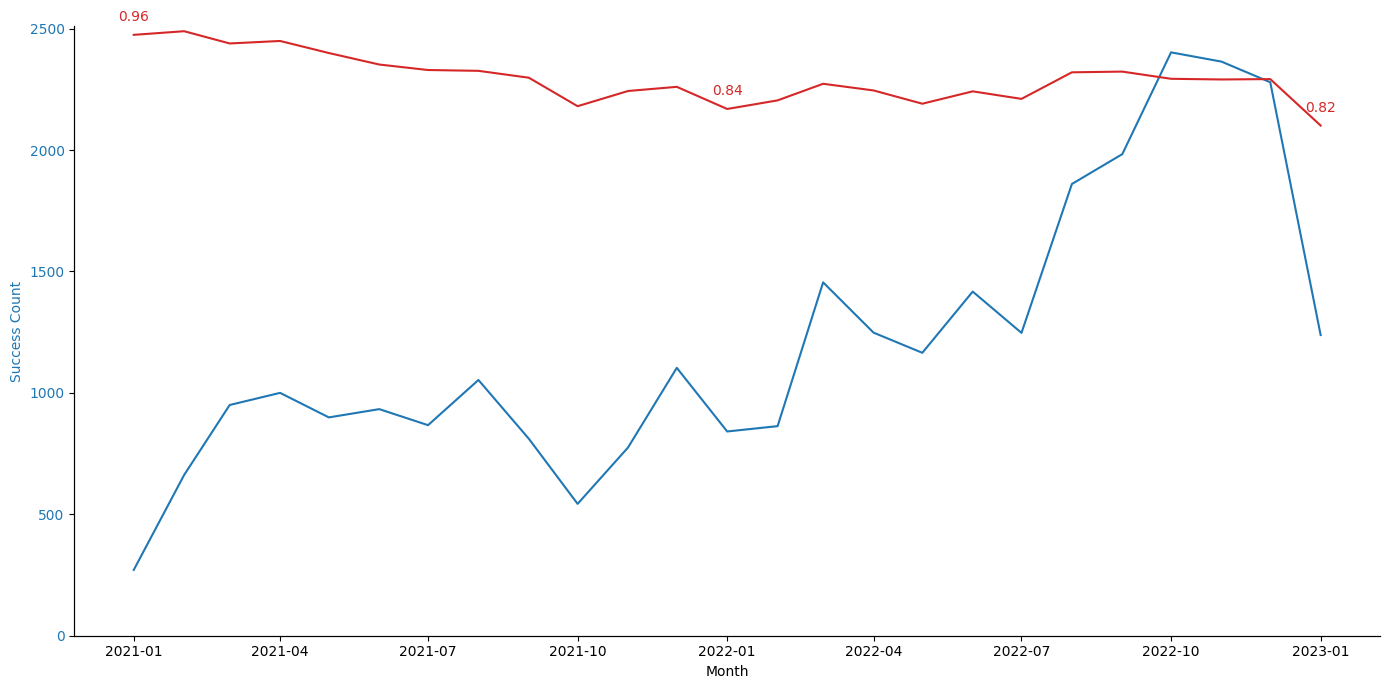

In [ ]:
# Convert 'CallDate' to datetime format
data['CallDate'] = pd.to_datetime(data['CallDate'])

# Create a 'Month' column representing the month and year for each call
data['Month'] = data['CallDate'].dt.to_period('M')

# Group data by 'Month'
monthly_data = data.groupby('Month').agg(
    SuccessCount=('Success', 'sum'),
    AverageSuccessRate=('Success_Rate', 'mean')
).reset_index()

# Convert 'Month' to datetime format for plotting
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

# Plotting the time series of Success Count and Average Success Rate by month
fig, ax1 = plt.subplots(figsize=(14, 7))

# Success Count
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Success Count', color=color)
ax1.plot(monthly_data['Month'], monthly_data['SuccessCount'], color=color, label='Success Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

# Hide the top spine and set title
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

#plt.title('Success Count and Average Success Rate by Month')

# Rotate the x-ticks for better visibility
#plt.xticks(rotation=45)

# Instantiate a second y-axis to plot Average Success Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Success Rate', color=color)
line = ax2.plot(monthly_data['Month'], monthly_data['AverageSuccessRate'], color=color, label='Average Success Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)

# Hide the top spine and the right y-axis
ax2.spines['top'].set_visible(False)

ax2.yaxis.set_visible(False)  # This line hides the right y-axis and its values
ax2.spines['right'].set_visible(False)


# New Code: Annotate the beginning, middle, and end points of the Average Success Rate line
# Retrieve the x and y data of the line
x_data, y_data = line[0].get_data()

# Positions for beginning, middle, and end
positions = [0, len(x_data) // 2, len(x_data) - 1]

for pos in positions:
    ax2.annotate(f'{y_data[pos]:.2f}', # This formats the number to 2 decimal places
                 (x_data[pos], y_data[pos]), 
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color=color)

# Show plot
fig.tight_layout()
plt.show()

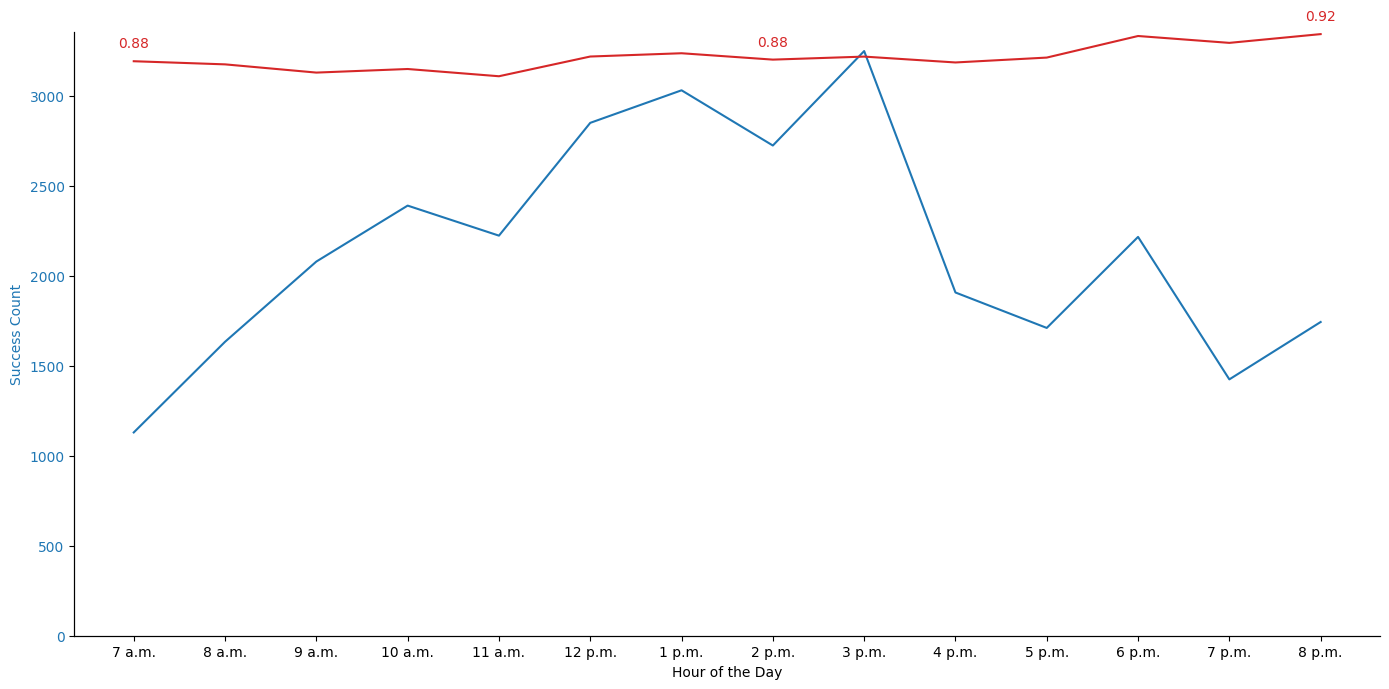

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Convert 'CallDate' to datetime format
complete_data['CallDate'] = pd.to_datetime(complete_data['CallDate'])

# Create an 'Hour' column representing the hour of the day for each call
complete_data['Hour'] = complete_data['CallDate'].dt.hour

# Group complete_data by 'Hour'
hourly_complete_data = complete_data.groupby('Hour').agg(
    SuccessCount=('Success', 'sum'),
    AverageSuccessRate=('Success_Rate', 'mean')
).reset_index()

# Define a function to format the x-axis labels
def format_hour(value, tick_number):
    hour = int(value)
    if hour == 0:
        return '12 a.m.'
    elif hour < 12:
        return f'{hour} a.m.'
    elif hour == 12:
        return '12 p.m.'
    else:
        return f'{hour - 12} p.m.'

# Plotting the time series of Success Count and Average Success Rate by hour of the day
fig, ax1 = plt.subplots(figsize=(14, 7))

# Apply the formatter to the x-axis
ax1.xaxis.set_major_formatter(FuncFormatter(format_hour))

# Success Count
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Success Count', color=color)
ax1.plot(hourly_complete_data['Hour'], hourly_complete_data['SuccessCount'], color=color, label='Success Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Rotate the x-ticks for better visibility
plt.xticks(range(0, 24))  # Assuming a 24-hour format for clarity

# Instantiate a second y-axis to plot Average Success Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Success Rate', color=color)
line = ax2.plot(hourly_complete_data['Hour'], hourly_complete_data['AverageSuccessRate'], color=color, label='Average Success Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)

# Hide the top spine and the right y-axis
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_visible(False)  # This line hides the right y-axis and its values
ax2.spines['right'].set_visible(False)

# Annotate the beginning, middle, and end points of the Average Success Rate line
x_complete_data, y_complete_data = line[0].get_data()
positions = [0, len(x_complete_data) // 2, len(x_complete_data) - 1]
for pos in positions:
    ax2.annotate(f'{y_complete_data[pos]:.2f}', (x_complete_data[pos], y_complete_data[pos]),
                 textcoords="offset points", xytext=(0,10), ha='center', color=color)

# Show plot
fig.tight_layout()
plt.show()

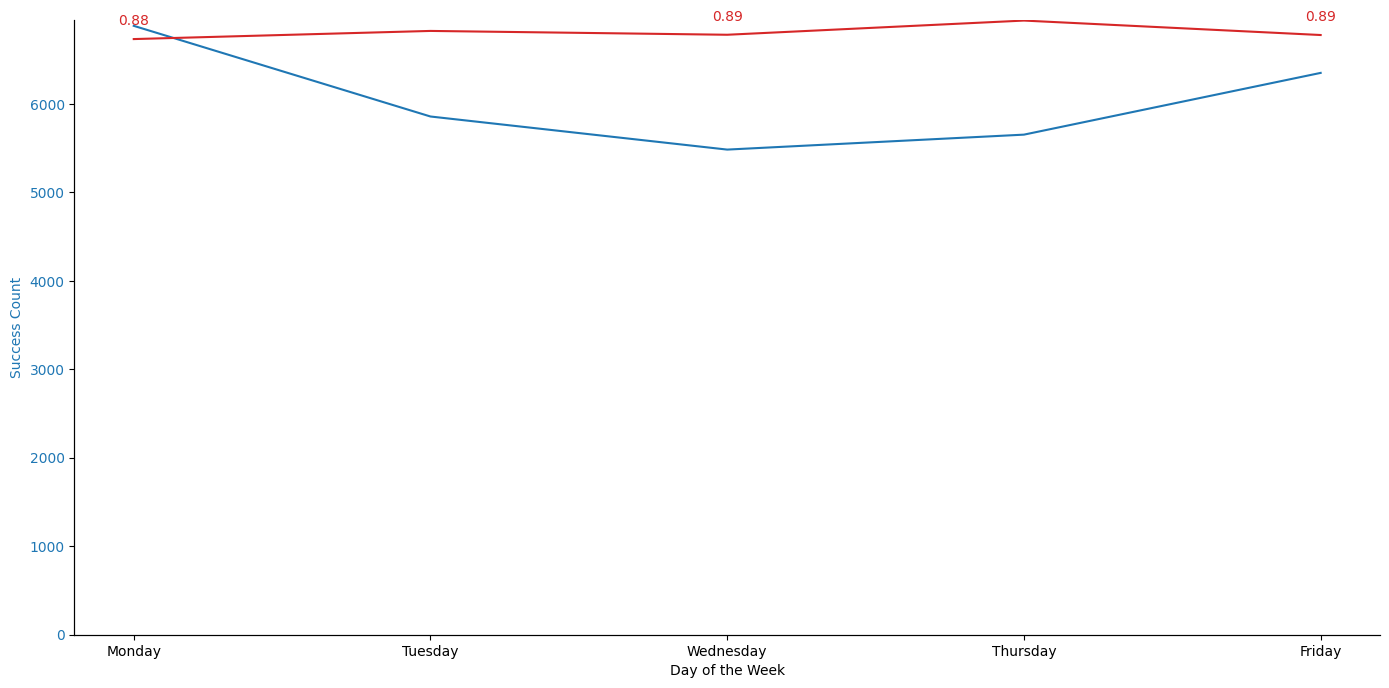

In [ ]:
# Make sure 'CallDate' is in datetime format
data['CallDate'] = pd.to_datetime(data['CallDate'])

# Extract day of the week name from 'CallDate'
data['DayName'] = data['CallDate'].dt.day_name()

# Group data by 'DayName'
weekly_data = data.groupby('DayName').agg(
    SuccessCount=('Success', 'sum'),
    AverageSuccessRate=('Success_Rate', 'mean')
).reset_index()

# Order the DataFrame by the day of the week
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_data['DayName'] = pd.Categorical(weekly_data['DayName'], categories=ordered_days, ordered=True)
weekly_data = weekly_data.sort_values('DayName')

# Plotting the time series of Success Count and Average Success Rate by day of the week
fig, ax1 = plt.subplots(figsize=(14, 7))

# Success Count
color = 'tab:blue'
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Success Count', color=color)
ax1.plot(weekly_data['DayName'], weekly_data['SuccessCount'], color=color, label='Success Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

# Hide the top spine and set title
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

#plt.title('Success Count and Average Success Rate by Day of the Week')

# Rotate the x-ticks for better visibility
#plt.xticks(rotation=45)

# Instantiate a second y-axis to plot Average Success Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Success Rate', color=color)
line = ax2.plot(weekly_data['DayName'], weekly_data['AverageSuccessRate'], color=color, label='Average Success Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0)

# Hide the top spine and the right y-axis
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_visible(False)  # This line hides the right y-axis and its values
ax2.spines['right'].set_visible(False)


# Annotate the beginning, middle, and end points of the Average Success Rate line
x_data = weekly_data['DayName']
y_data = weekly_data['AverageSuccessRate']
positions = [0, len(x_data) // 2, len(x_data) - 1]  # Get the positions for beginning, middle, and end

for pos in positions:
    ax2.annotate(f'{y_data.iloc[pos]:.2f}',  # Format the number to 2 decimal places
                 (x_data.iloc[pos], y_data.iloc[pos]), 
                 textcoords="offset points",  # How to position the text
                 xytext=(0,10),  # Distance from text to points (x,y)
                 ha='center',  # Horizontal alignment can be left, right or center
                 color=color)

# Show plot
fig.tight_layout()
plt.show()


In [ ]:
complete_data['CallDate'].min()

Timestamp('2021-01-07 15:13:37.357000')

In [ ]:
complete_data['CallDate'].max()

Timestamp('2023-02-14 00:00:00')

In [ ]:
# Print the first few rows to check if the data is present
print(hourly_data.head())

# Print the data types to confirm there are no inconsistencies
print(hourly_data.dtypes)


   HourOfDay  SuccessCount  AverageSuccessRate
0          0         30229            0.888824
HourOfDay               int32
SuccessCount            int64
AverageSuccessRate    float64
dtype: object


In [ ]:
print(error here)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (54955975.py, line 1)

---

## Continue building the dataset

Breaking the CallDate into 2 variables, 'CallYear' and 'CallDay' so it is sutable for the model

In [125]:
# Create 'CallYear' by extracting the year from 'CallDate'
complete_data['CallYear'] = complete_data['CallDate'].dt.year

# Create 'CallMonth' by extracting the month from 'CallDate'
complete_data['CallMonth'] = complete_data['CallDate'].dt.month

# Create 'CallDay' by extracting the day from 'CallDate'
complete_data['CallDay'] = complete_data['CallDate'].dt.day

# Drop the CallDate column
complete_data.drop('CallDate', axis=1, inplace=True)

# Reorderng the columns so the date variables are at the beginning
# Get a list of the current column names
cols = list(complete_data.columns)

# Create a new list of column names with 'CallYear', 'CallMonth', and 'CallDay' as the third, fourth, and fifth columns
new_cols = cols[:2] + ['CallYear', 'CallMonth', 'CallDay'] + cols[2:-3]

# Reorder the columns
complete_data = complete_data[new_cols]

Dealing with missing data

In [126]:
# Complete_data DF Missing %
pd.set_option('display.max_rows', None)


missing_values_percentage_complete_data = complete_data.isnull().mean() * 100
missing_values_percentage_complete_data_sorted = missing_values_percentage_complete_data.sort_values(ascending=False)
missing_values_percentage_complete_data_sorted

COamt              91.950329
Promo              89.013879
IncType2           63.038714
WriteOff_Score      0.274653
IncType1            0.151936
HomeType            0.122717
CallID              0.000000
Delinq10            0.000000
JobYears1           0.000000
JobYears2           0.000000
Age1                0.000000
Age2                0.000000
DownPmt             0.000000
Payments            0.000000
Delinq30            0.000000
Upgrade             0.000000
Delinq60            0.000000
Delinq90            0.000000
Delinq120           0.000000
DelinqTot           0.000000
FPDever             0.000000
FPD                 0.000000
PmtType             0.000000
Status              0.000000
ClosedStatus        0.000000
WriteOff            0.000000
UNRATE              0.000000
Income              0.000000
RiskScore           0.000000
Acct                0.000000
Industry            0.000000
CallYear            0.000000
CallMonth           0.000000
CallDay             0.000000
Workgroup     

In [127]:
# Success_Rate is removed because it is very similar to Success column, also new customers will have NaN values.
complete_data.drop(columns = ['Success_Rate','COamt','Promo','IncType2','CallID','Acct','Status',
'ClosedStatus','Status','WriteOff','Upgrade','WrapCat'],inplace = True)

In [128]:
complete_data = complete_data.dropna()

In [129]:
# Complete_data DF Missing %
pd.set_option('display.max_rows', None)


missing_values_percentage_complete_data = complete_data.isnull().mean() * 100
missing_values_percentage_complete_data_sorted = missing_values_percentage_complete_data.sort_values(ascending=False)
missing_values_percentage_complete_data_sorted

CallYear           0.0
CallMonth          0.0
IncType1           0.0
JobYears1          0.0
JobYears2          0.0
Age1               0.0
Age2               0.0
HomeType           0.0
DownPmt            0.0
Payments           0.0
Delinq10           0.0
Delinq30           0.0
Delinq60           0.0
Delinq90           0.0
Delinq120          0.0
DelinqTot          0.0
FPDever            0.0
FPD                0.0
PmtType            0.0
WriteOff_Score     0.0
UNRATE             0.0
Income             0.0
RiskScore          0.0
Industry           0.0
PrinAmt            0.0
CallDay            0.0
Workgroup          0.0
Campaign           0.0
Success            0.0
CallCount          0.0
CallDuration       0.0
LoanAmt            0.0
PmtAmt             0.0
IntrAmt            0.0
BrandGroup         0.0
PmtAmt_per         0.0
PrinAmt_per        0.0
IntrAmt_per        0.0
Overpayment        0.0
Tot_payment_Num    0.0
PmtDuration        0.0
FinProd            0.0
Brand              0.0
DPRIME     

In [130]:
complete_data.shape

(34131, 44)

Dealing with categorical variables

First dealing with Binary variables

1

In [131]:
complete_data['FPDever'].value_counts() 

FPDever
N    31287
Y     2844
Name: count, dtype: int64

In [132]:
complete_data['FPDever'] = np.where(complete_data['FPDever'] == 'Y',1,0)

2

In [133]:
complete_data['FPD'].value_counts() 

FPD
N    34064
Y       67
Name: count, dtype: int64

In [134]:
complete_data['FPD'] = np.where(complete_data['FPD'] == 'Y',1,0)

3

In [135]:
complete_data['PmtType'].value_counts()

PmtType
A    29320
S     4811
Name: count, dtype: int64

In [136]:
complete_data['PmtType'] = np.where(complete_data['PmtType'] == 'A',1,0)

In [137]:
complete_data['PmtType'].value_counts()

PmtType
1    29320
0     4811
Name: count, dtype: int64

In [138]:
print(complete_data['Workgroup'].nunique())
print(complete_data['Campaign'].nunique())
print(complete_data['Brand'].nunique())
print(complete_data['BrandGroup'].nunique())
print(complete_data['Industry'].nunique())
print(complete_data['IncType1'].nunique())
print(complete_data['HomeType'].nunique())


16
10
36
12
5
8
5


Analyzing the unique values in each categorical variable

Note that Workgroup and Campaign are similar but Campaign have less unique values. I include both now, then remove WorkGroup and see if there is any difference.

HomeType has a unique value called 'HomeType_ZZZZZZZZZZ' and 'PROVIDED'  not sure what are these but will leave them for now.


In [139]:
# Assuming 'complete_data' is your DataFrame

# List of columns to get unique values from
columns = ['Workgroup', 'Campaign', 'BrandGroup', 'Industry', 'IncType1', 'HomeType','FinProd']

# Creating a dictionary to hold unique values for each column
unique_values_dict = {col: complete_data[col].unique().tolist() for col in columns}

# Finding the maximum number of unique values across all columns to standardize the DataFrame shape
max_unique_values = max(len(values) for values in unique_values_dict.values())

# Standardizing the length of each list in the dictionary to ensure DataFrame can be formed
for col, values in unique_values_dict.items():
    # Padding with None or a placeholder if you prefer
    unique_values_dict[col] = values + [None] * (max_unique_values - len(values))

# Converting the dictionary into a DataFrame for a tabular view
unique_values_df = pd.DataFrame(unique_values_dict)

# Displaying the table
unique_values_df


,Workgroup,Campaign,BrandGroup,Industry,IncType1,HomeType,FinProd
0,Dialer Spanish Courtesy,Spanish Courtesy,PR,OTHER,WAGES,HOUSE,IBFR
1,Dialer Courtesy Calls,Courtesy,R,HOME CLEAN,SOCIALSECURITY,APRTMT,PCFR
2,Dialer Spanish Recovery,Spanish Recovery,SM,COOKWARE,SELFEMPLOYED,ZZZZZZZZZZ,IBSP
3,Dialer Recovery,Recovery,VC,WATER,RETIRED,MOBILE,RVNR
4,Dialer Special Handling,Special Handling,K,HOME IMPRV,UNEMPLOYMENT,PROVIDED,PCSP
5,Spanish Customer Service,Spanish Grace,AL,None,UNCLASSIFIED,None,RVFR
6,Dialer Spanish Grace,Spanish Special Handling,BD,None,DISABILITY,None,RVSP
7,Dialer Spanish Special Handling,Spanish Collections 90 Day,W,None,CHILDSUPPORT,None,PCNR
8,Dialer Spanish Collections 90 Day,Grace,OT,None,None,None,IBNR
9,Dialer Grace,Collections 90 Day,CW,None,None,None,None


Dropping 'Brand' for now as it has 36 unique values and there is already a broader 'BrandGroup' Variable.

In [140]:
complete_data.drop('Brand',axis = 1,inplace = True)

In [141]:
dummy_columns = ['Workgroup', 'Campaign', 'BrandGroup', 'Industry', 'IncType1', 'HomeType','FinProd']
complete_data = pd.get_dummies(complete_data, columns=dummy_columns) #Produces True or False

# Convert the True or False to 1 or 0
for col in dummy_columns:
    for dummy_col in complete_data.columns[complete_data.columns.str.startswith(col)]:
        complete_data[dummy_col] = complete_data[dummy_col] * 1

In [142]:
complete_data.head()

,CallYear,CallMonth,CallDay,Success,CallCount,CallDuration,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,RiskScore,Income,JobYears1,JobYears2,Age1,Age2,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,WriteOff_Score,UNRATE,DPRIME,Workgroup_Client Relations,Workgroup_Customer Service,Workgroup_Dialer Collections 90 Day,Workgroup_Dialer Courtesy Calls,Workgroup_Dialer Grace,Workgroup_Dialer Recovery,Workgroup_Dialer Spanish Collections 90 Day,Workgroup_Dialer Spanish Courtesy,Workgroup_Dialer Spanish Grace,Workgroup_Dialer Spanish Recovery,Workgroup_Dialer Spanish Special Handling,Workgroup_Dialer Special Handling,Workgroup_Recovery/SH Sup,Workgroup_Spanish Customer Service,Workgroup_Spanish Recovery,Workgroup__SystemIvrTransferHub_,Campaign_Collections 90 Day,Campaign_Courtesy,Campaign_Grace,Campaign_Recovery,Campaign_Spanish Collections 90 Day,Campaign_Spanish Courtesy,Campaign_Spanish Grace,Campaign_Spanish Recovery,Campaign_Spanish Special Handling,Campaign_Special Handling,BrandGroup_AL,BrandGroup_BD,BrandGroup_CW,BrandGroup_IN,BrandGroup_K,BrandGroup_MS,BrandGroup_OT,BrandGroup_PR,BrandGroup_R,BrandGroup_SM,BrandGroup_VC,BrandGroup_W,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ,FinProd_IBFR,FinProd_IBNR,FinProd_IBSP,FinProd_PCFR,FinProd_PCNR,FinProd_PCSP,FinProd_RVFR,FinProd_RVNR,FinProd_RVSP
0,2022,9,29,1,1,0,2599.00,248.96,74.96,174.00,9.579069,2.884186,6.694883,0,4,3,8590,1320.0,2.00,0.0,30,0,0.00,4,0,0,0,0,0,0,0,0,1,0.005696,3.5,6.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2022,9,29,1,1,0,2995.00,457.44,224.96,232.48,15.273456,7.511185,7.762270,0,4,3,6640,5600.0,2.25,0.0,20,0,209.65,4,0,0,0,0,0,0,0,0,1,0.008181,3.5,6.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2022,9,29,1,1,0,450.92,207.75,177.57,30.18,46.072474,39.379491,6.692983,0,5,4,0,800.0,0.00,0.0,70,0,3000.00,5,0,0,0,0,0,0,0,0,1,0.001877,3.5,6.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2022,9,29,1,1,0,3796.92,454.04,215.11,238.93,11.958113,5.665381,6.292732,0,4,3,9260,870.0,0.00,0.0,64,0,100.00,4,0,0,0,0,0,0,0,0,1,0.008577,3.5,6.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2022,9,29,1,1,0,3380.34,516.32,276.00,240.32,15.274203,8.164859,7.109344,0,4,3,8900,9598.0,10.00,4.5,33,33,0.00,4,0,0,0,0,0,0,0,0,1,0.001919,3.5,6.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [143]:
complete_data.shape

(34131, 101)

In [144]:
#print(error here)

# **`Models`**

# **`Models 1`**


Logistic regression

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc


In [157]:
X = complete_data.drop('Success', axis=1)  # This removes the 'Success' column and keeps the rest as features

y = complete_data['Success']


In [ ]:
X_og = X.copy()

In [ ]:
X_og.head()

,CallYear,CallMonth,CallDay,CallCount,CallDuration,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,RiskScore,Income,JobYears1,JobYears2,Age1,Age2,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,WriteOff_Score,UNRATE,DPRIME,Workgroup_Client Relations,Workgroup_Customer Service,Workgroup_Dialer Collections 90 Day,Workgroup_Dialer Courtesy Calls,Workgroup_Dialer Grace,Workgroup_Dialer Recovery,Workgroup_Dialer Spanish Collections 90 Day,Workgroup_Dialer Spanish Courtesy,Workgroup_Dialer Spanish Grace,Workgroup_Dialer Spanish Recovery,Workgroup_Dialer Spanish Special Handling,Workgroup_Dialer Special Handling,Workgroup_Recovery/SH Sup,Workgroup_Spanish Customer Service,Workgroup_Spanish Recovery,Workgroup__SystemIvrTransferHub_,Campaign_Collections 90 Day,Campaign_Courtesy,Campaign_Grace,Campaign_Recovery,Campaign_Spanish Collections 90 Day,Campaign_Spanish Courtesy,Campaign_Spanish Grace,Campaign_Spanish Recovery,Campaign_Spanish Special Handling,Campaign_Special Handling,BrandGroup_AL,BrandGroup_BD,BrandGroup_CW,BrandGroup_IN,BrandGroup_K,BrandGroup_MS,BrandGroup_OT,BrandGroup_PR,BrandGroup_R,BrandGroup_SM,BrandGroup_VC,BrandGroup_W,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ,FinProd_IBFR,FinProd_IBNR,FinProd_IBSP,FinProd_PCFR,FinProd_PCNR,FinProd_PCSP,FinProd_RVFR,FinProd_RVNR,FinProd_RVSP
0,2022,9,29,1,0,2599.00,248.96,74.96,174.00,9.579069,2.884186,6.694883,0,4,3,8590,1320.0,2.00,0.0,30,0,0.00,4,0,0,0,0,0,0,0,0,1,0.005696,3.5,6.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2022,9,29,1,0,2995.00,457.44,224.96,232.48,15.273456,7.511185,7.762270,0,4,3,6640,5600.0,2.25,0.0,20,0,209.65,4,0,0,0,0,0,0,0,0,1,0.008181,3.5,6.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2022,9,29,1,0,450.92,207.75,177.57,30.18,46.072474,39.379491,6.692983,0,5,4,0,800.0,0.00,0.0,70,0,3000.00,5,0,0,0,0,0,0,0,0,1,0.001877,3.5,6.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2022,9,29,1,0,3796.92,454.04,215.11,238.93,11.958113,5.665381,6.292732,0,4,3,9260,870.0,0.00,0.0,64,0,100.00,4,0,0,0,0,0,0,0,0,1,0.008577,3.5,6.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2022,9,29,1,0,3380.34,516.32,276.00,240.32,15.274203,8.164859,7.109344,0,4,3,8900,9598.0,10.00,4.5,33,33,0.00,4,0,0,0,0,0,0,0,0,1,0.001919,3.5,6.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_og.drop(columns = ['CallCount','CallDuration','PmtAmt_per','PrinAmt_per','IntrAmt_per','PmtDuration','WriteOff_Score','UNRATE','DPRIME'], inplace = True)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Corrected column list (assuming transform_columns is the one you want)
transform_columns = ['CallYear','CallDay','LoanAmt','PmtAmt','PrinAmt','IntrAmt','PmtAmt_per',
'PrinAmt_per','IntrAmt_per','RiskScore','Income','DownPmt']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# Make sure to use .loc[:, columns] for proper assignment
X_train.loc[:, transform_columns] = scaler.fit_transform(X_train[transform_columns])

# Transform the test data using the fitted scaler
# Ensure you're transforming the same columns as fitted on the training set
X_test.loc[:, transform_columns] = scaler.transform(X_test[transform_columns])


C:\Users\ahmed\AppData\Local\Temp\ipykernel_20612\189789794.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.36182663  0.47103749  0.47103749 ...  0.47103749  0.47103749
 -1.36182663]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_train.loc[:, transform_columns] = scaler.fit_transform(X_train[transform_columns])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_20612\189789794.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.34688932 -1.57288037 -0.66945934 ...  0.34688932  0.68567221
  0.91152747]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_train.loc[:, transform_columns] = scaler.fit_transform(X_train[transform_columns])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_20612\189789794.py:10: FutureWarning: Setting an item of incompatible dtype is

Logistic regression

In [159]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Train the model
log_reg.fit(X_train, y_train)

c:\Users\ahmed\OneDrive\Desktop\Python\Libraries\Pandas\Kaggle Pandas\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [250]:
# Predict on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9160685513402665
Confusion Matrix:
 [[ 313  471]
 [ 102 5941]]


---

xgboost model

In [208]:
import xgboost as xgb

In [209]:
# Initialize the XGBoost classifier
xg_class = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)

# Fit the model
xg_class.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xg_class.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) #True positive + True Negative/ Total num of observation
recall = recall_score(y_test, y_pred) #True positive rate( TP/Acutal Positive)
presicion = precision_score(y_test, y_pred) #True positive/ Predicted Positive

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("Presicion: %.2f%%" % (presicion * 100.0))


Accuracy: 94.58%
Recall: 97.04%
Presicion: 96.85%


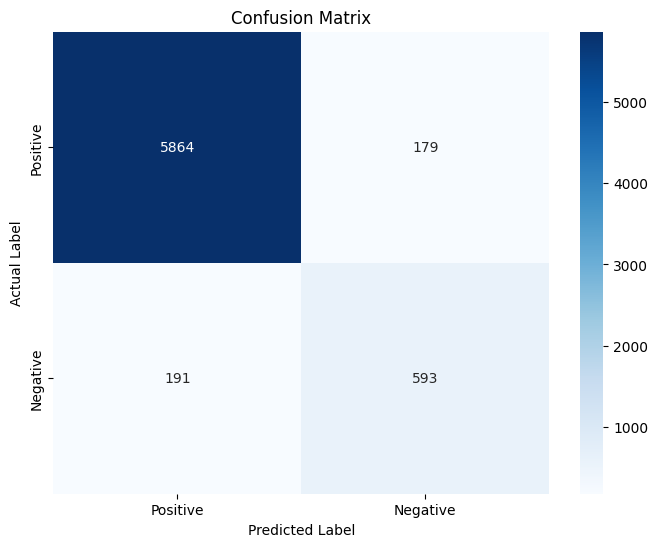

In [210]:
# Compute confusion matrix with specified label order
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Assuming 1 is for Positive and 0 for Negative

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN = cm[1][1]  
FP = cm[1][0] 

specificity = TN / (TN + FP)

print("Specificity: %.2f%%" % (specificity * 100.0))


Specificity: 76.40%


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


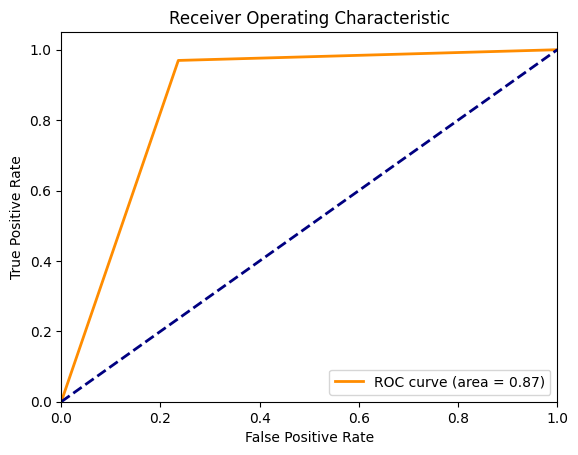

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

---

Nueral Network

In [160]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [161]:
model_1 = Sequential(
    [
        Dense(180,activation = 'relu'),
        Dense(160,activation = 'relu'),
        Dense(140,activation = 'relu'),
        Dense(120,activation = 'relu'),
        Dense(90,activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)

In [162]:
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [166]:
model_1.fit(X_train, y_train, epochs=60)

Epoch 1/60
815/854 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2118

854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2116
Epoch 2/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2019
Epoch 3/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1956
Epoch 4/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1829
Epoch 5/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1874
Epoch 6/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1821
Epoch 7/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1847
Epoch 8/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1736
Epoch 9/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1732
Epoch 10/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1980
Epoch 11/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1654
Epoch 12/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1721
Epoch 13/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1762
Epoch 14/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1546
Epoch 15/60
854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1650


In [218]:
# Predicting the Test set results
y_pred = model_1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Correctly convert probabilities to binary values


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 93.97%
Precision: 97.84%
Recall: 95.28%


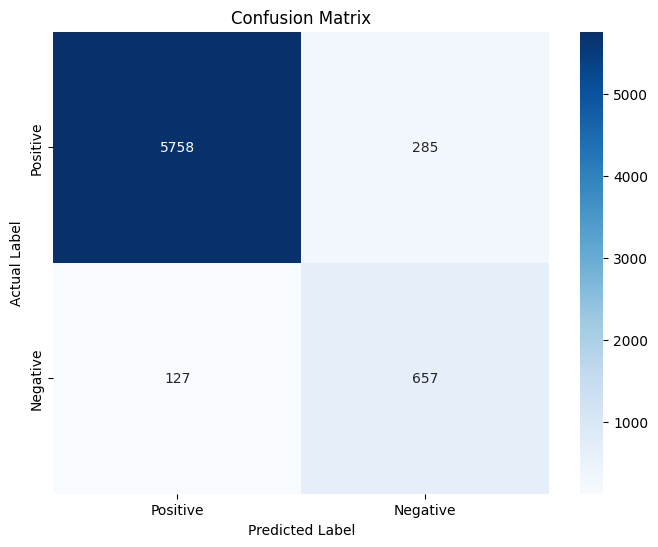

In [219]:
# Compute confusion matrix 
cm = confusion_matrix(y_test,y_pred, labels=[1, 0])  # Assuming 1 is for Positive and 0 for Negative

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()


precision the TF divided by predicted positive, and recall is TF divided by actual positive

In [169]:
TN = cm[1][1]  
FP = cm[1][0] 

specificity = TN / (TN + FP)

print("Specificity: %.2f%%" % (specificity * 100.0))



Specificity: 96.56%


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


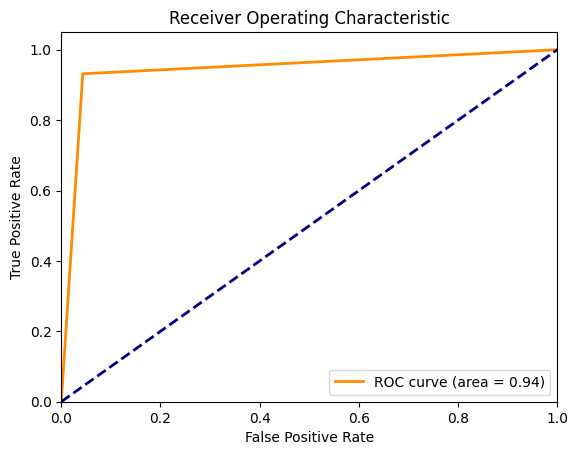

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


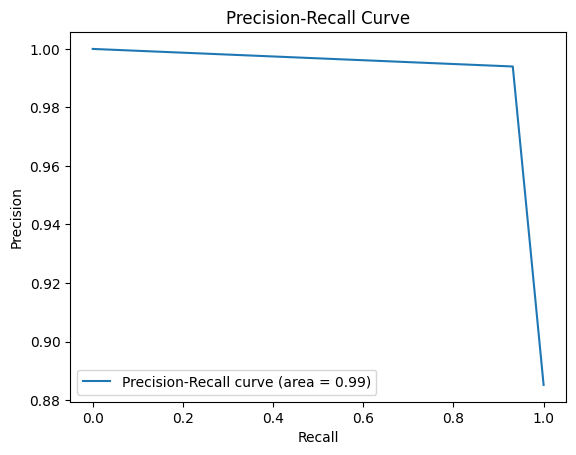

In [ ]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate the area under the curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


#### Account Journey

Identify Negative Predictions

Retrieve Accounts

In [179]:
choosen_acct = complete_data[(complete_data['RiskScore'] == 7445) & (complete_data['Delinq10'] == 9)]

In [217]:
choosen_acct 

,CallYear,CallMonth,CallDay,Success,CallCount,CallDuration,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,RiskScore,Income,JobYears1,JobYears2,Age1,Age2,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,WriteOff_Score,UNRATE,DPRIME,Workgroup_Client Relations,Workgroup_Customer Service,Workgroup_Dialer Collections 90 Day,Workgroup_Dialer Courtesy Calls,Workgroup_Dialer Grace,Workgroup_Dialer Recovery,Workgroup_Dialer Spanish Collections 90 Day,Workgroup_Dialer Spanish Courtesy,Workgroup_Dialer Spanish Grace,Workgroup_Dialer Spanish Recovery,Workgroup_Dialer Spanish Special Handling,Workgroup_Dialer Special Handling,Workgroup_Recovery/SH Sup,Workgroup_Spanish Customer Service,Workgroup_Spanish Recovery,Workgroup__SystemIvrTransferHub_,Campaign_Collections 90 Day,Campaign_Courtesy,Campaign_Grace,Campaign_Recovery,Campaign_Spanish Collections 90 Day,Campaign_Spanish Courtesy,Campaign_Spanish Grace,Campaign_Spanish Recovery,Campaign_Spanish Special Handling,Campaign_Special Handling,BrandGroup_AL,BrandGroup_BD,BrandGroup_CW,BrandGroup_IN,BrandGroup_K,BrandGroup_MS,BrandGroup_OT,BrandGroup_PR,BrandGroup_R,BrandGroup_SM,BrandGroup_VC,BrandGroup_W,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ,FinProd_IBFR,FinProd_IBNR,FinProd_IBSP,FinProd_PCFR,FinProd_PCNR,FinProd_PCSP,FinProd_RVFR,FinProd_RVNR,FinProd_RVSP
16435,2021,10,19,0,3,3,3773.07,2767.68,1423.81,1343.87,73.353529,37.736114,35.617415,0,16,16,7445,12000.0,4.0,2.0,21,52,0.0,16,9,0,0,0,0,10,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
17180,2021,11,17,1,3,3,3773.07,2767.68,1423.81,1343.87,73.353529,37.736114,35.617415,0,16,16,7445,12000.0,4.0,2.0,21,52,0.0,16,9,0,0,0,0,10,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
33220,2021,8,4,1,3,3,3773.07,2767.68,1423.81,1343.87,73.353529,37.736114,35.617415,0,16,16,7445,12000.0,4.0,2.0,21,52,0.0,16,9,0,0,0,0,10,0,0,1,0.965409,4.566667,3.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [184]:
row_as_dict = choosen_acct.iloc[0].to_dict()

In [185]:
data_points = [
    {"PmtAmt": 153.76, "PrinAmt": 5.78, "IntrAmt": 147.98, "Delinq10": 1, "DelinqTot": 1, "PmtAmt_per": 4.08, "PrinAmt_per": 0.15, "IntrAmt_per": 3.92},
    {"PmtAmt": 461.28, "PrinAmt": 185.81, "IntrAmt": 275.47, "Delinq10": 1, "DelinqTot": 2, "PmtAmt_per": 12.23, "PrinAmt_per": 4.92, "IntrAmt_per": 7.30},
    {"PmtAmt": 1537.6, "PrinAmt": 788.02, "IntrAmt": 749.58, "Delinq10": 2, "DelinqTot": 3, "PmtAmt_per": 40.75, "PrinAmt_per": 20.89, "IntrAmt_per": 19.87},
    {"PmtAmt": 1691.31, "PrinAmt": 831.12, "IntrAmt": 879.69, "Delinq10": 3, "DelinqTot": 4, "PmtAmt_per": 44.83, "PrinAmt_per": 22.03, "IntrAmt_per": 23.31},
    {"PmtAmt": 1845.07, "PrinAmt": 874.24, "IntrAmt": 990.33, "Delinq10": 4, "DelinqTot": 5, "PmtAmt_per": 48.90, "PrinAmt_per": 23.17, "IntrAmt_per": 26.25},
    {"PmtAmt": 1998.83, "PrinAmt": 967.95, "IntrAmt": 1050.38, "Delinq10": 5, "DelinqTot": 6, "PmtAmt_per": 52.98, "PrinAmt_per": 25.65, "IntrAmt_per": 27.84},
    {"PmtAmt": 2152.59, "PrinAmt": 1051.62, "IntrAmt": 1120.47, "Delinq10": 6, "DelinqTot": 7, "PmtAmt_per": 57.05, "PrinAmt_per": 27.87, "IntrAmt_per": 29.70},
    {"PmtAmt": 2306.35, "PrinAmt": 1147.15, "IntrAmt": 1175.5, "Delinq10": 7, "DelinqTot": 8, "PmtAmt_per": 61.13, "PrinAmt_per": 30.40, "IntrAmt_per": 31.16},
    {"PmtAmt": 2460.11, "PrinAmt": 1242.68, "IntrAmt": 1233.73, "Delinq10": 8, "DelinqTot": 9, "PmtAmt_per": 65.20, "PrinAmt_per": 32.94, "IntrAmt_per": 32.70},
    {"PmtAmt": 2613.87, "PrinAmt": 131.09, "IntrAmt": 1288.52, "Delinq10": 9, "DelinqTot": 10, "PmtAmt_per": 69.27, "PrinAmt_per": 3.47, "IntrAmt_per": 34.15}
]


In [188]:
# Initialize an empty list to store the updated dictionaries
updated_dicts = []

# Loop through each dictionary in data_points
for update in data_points:
    # Make a copy of row_as_dict to preserve its original state
    temp_dict = row_as_dict.copy()
    
    # Update the temp_dict with the values from the current dictionary in data_points
    temp_dict.update(update)
    
    # Append the updated dictionary to the list
    updated_dicts.append(temp_dict)

# Convert the list of dictionaries to a DataFrame
updated_acc= pd.DataFrame(updated_dicts)


In [189]:
updated_acc

,CallYear,CallMonth,CallDay,Success,CallCount,CallDuration,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,RiskScore,Income,JobYears1,JobYears2,Age1,Age2,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,WriteOff_Score,UNRATE,DPRIME,Workgroup_Client Relations,Workgroup_Customer Service,Workgroup_Dialer Collections 90 Day,Workgroup_Dialer Courtesy Calls,Workgroup_Dialer Grace,Workgroup_Dialer Recovery,Workgroup_Dialer Spanish Collections 90 Day,Workgroup_Dialer Spanish Courtesy,Workgroup_Dialer Spanish Grace,Workgroup_Dialer Spanish Recovery,Workgroup_Dialer Spanish Special Handling,Workgroup_Dialer Special Handling,Workgroup_Recovery/SH Sup,Workgroup_Spanish Customer Service,Workgroup_Spanish Recovery,Workgroup__SystemIvrTransferHub_,Campaign_Collections 90 Day,Campaign_Courtesy,Campaign_Grace,Campaign_Recovery,Campaign_Spanish Collections 90 Day,Campaign_Spanish Courtesy,Campaign_Spanish Grace,Campaign_Spanish Recovery,Campaign_Spanish Special Handling,Campaign_Special Handling,BrandGroup_AL,BrandGroup_BD,BrandGroup_CW,BrandGroup_IN,BrandGroup_K,BrandGroup_MS,BrandGroup_OT,BrandGroup_PR,BrandGroup_R,BrandGroup_SM,BrandGroup_VC,BrandGroup_W,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ,FinProd_IBFR,FinProd_IBNR,FinProd_IBSP,FinProd_PCFR,FinProd_PCNR,FinProd_PCSP,FinProd_RVFR,FinProd_RVNR,FinProd_RVSP
0,2021.0,10.0,19.0,0.0,3.0,3.0,3773.07,153.76,5.78,147.98,4.08,0.15,3.92,0.0,16.0,16.0,7445.0,12000.0,4.0,2.0,21.0,52.0,0.0,16.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.965409,4.566667,3.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021.0,10.0,19.0,0.0,3.0,3.0,3773.07,461.28,185.81,275.47,12.23,4.92,7.30,0.0,16.0,16.0,7445.0,12000.0,4.0,2.0,21.0,52.0,0.0,16.0,1,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.965409,4.566667,3.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021.0,10.0,19.0,0.0,3.0,3.0,3773.07,1537.60,788.02,749.58,40.75,20.89,19.87,0.0,16.0,16.0,7445.0,12000.0,4.0,2.0,21.0,52.0,0.0,16.0,2,0.0,0.0,0.0,0.0,3,0.0,0.0,1.0,0.965409,4.566667,3.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021.0,10.0,19.0,0.0,3.0,3.0,3773.07,1691.31,831.12,879.69,44.83,22.03,23.31,0.0,16.0,16.0,7445.0,12000.0,4.0,2.0,21.0,52.0,0.0,16.0,3,0.0,0.0,0.0,0.0,4,0.0,0.0,1.0,0.965409,4.566667,3.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021.0,10.0,19.0,0.0,3.0,3.0,3773.07,1845.07,874.24,990.33,48.90,23.17,26.25,0.0,16.0,16.0,7445.0,12000.0,4.0,2.0,21.0,52.0,0.0,16.0,4,0.0,0.0,0.0,0.0,5,0.0,0.0,1.0,0.965409,4.566667,3.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021.0,10.0,19.0,0.0,3.0,3.0,3773.07,1998.8

Removing the extra decimal points generated in unwanted columns, this is not nessearcy but looks better.

In [ ]:
7445.0. 0.965409

In [275]:
complete_data['WriteOff_Score'].describe()

count    3.413100e+04
mean     7.356208e-02
std      2.324105e-01
min      8.757587e-13
25%      1.913656e-05
50%      5.033527e-04
75%      6.262931e-03
max      1.000000e+00
Name: WriteOff_Score, dtype: float64

In [257]:
updated_acc

,CallYear,CallMonth,CallDay,CallCount,CallDuration,LoanAmt,PmtAmt,PrinAmt,IntrAmt,PmtAmt_per,PrinAmt_per,IntrAmt_per,Overpayment,Tot_payment_Num,PmtDuration,RiskScore,Income,JobYears1,JobYears2,Age1,Age2,DownPmt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,WriteOff_Score,UNRATE,DPRIME,Workgroup_Client Relations,Workgroup_Customer Service,Workgroup_Dialer Collections 90 Day,Workgroup_Dialer Courtesy Calls,Workgroup_Dialer Grace,Workgroup_Dialer Recovery,Workgroup_Dialer Spanish Collections 90 Day,Workgroup_Dialer Spanish Courtesy,Workgroup_Dialer Spanish Grace,Workgroup_Dialer Spanish Recovery,Workgroup_Dialer Spanish Special Handling,Workgroup_Dialer Special Handling,Workgroup_Recovery/SH Sup,Workgroup_Spanish Customer Service,Workgroup_Spanish Recovery,Workgroup__SystemIvrTransferHub_,Campaign_Collections 90 Day,Campaign_Courtesy,Campaign_Grace,Campaign_Recovery,Campaign_Spanish Collections 90 Day,Campaign_Spanish Courtesy,Campaign_Spanish Grace,Campaign_Spanish Recovery,Campaign_Spanish Special Handling,Campaign_Special Handling,BrandGroup_AL,BrandGroup_BD,BrandGroup_CW,BrandGroup_IN,BrandGroup_K,BrandGroup_MS,BrandGroup_OT,BrandGroup_PR,BrandGroup_R,BrandGroup_SM,BrandGroup_VC,BrandGroup_W,Industry_COOKWARE,Industry_HOME CLEAN,Industry_HOME IMPRV,Industry_OTHER,Industry_WATER,IncType1_CHILDSUPPORT,IncType1_DISABILITY,IncType1_RETIRED,IncType1_SELFEMPLOYED,IncType1_SOCIALSECURITY,IncType1_UNCLASSIFIED,IncType1_UNEMPLOYMENT,IncType1_WAGES,HomeType_APRTMT,HomeType_HOUSE,HomeType_MOBILE,HomeType_PROVIDED,HomeType_ZZZZZZZZZZ,FinProd_IBFR,FinProd_IBNR,FinProd_IBSP,FinProd_PCFR,FinProd_PCNR,FinProd_PCSP,FinProd_RVFR,FinProd_RVNR,FinProd_RVSP
0,2021,10,19,3,3,3773.07,153.76,5.78,147.98,4.08,0.15,3.92,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,1,0,0,0,0,1,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2021,10,19,3,3,3773.07,461.28,185.81,275.47,12.23,4.92,7.30,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,1,0,0,0,0,2,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,2021,10,19,3,3,3773.07,1537.60,788.02,749.58,40.75,20.89,19.87,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,2,0,0,0,0,3,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2021,10,19,3,3,3773.07,1691.31,831.12,879.69,44.83,22.03,23.31,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,3,0,0,0,0,4,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2021,10,19,3,3,3773.07,1845.07,874.24,990.33,48.90,23.17,26.25,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,4,0,0,0,0,5,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,2021,10,19,3,3,3773.07,1998.83,967.95,1050.38,52.98,25.65,27.84,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,5,0,0,0,0,6,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,2021,10,19,3,3,3773.07,2152.59,1051.62,1120.47,57.05,27.87,29.70,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,6,0,0,0,0,7,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7,2021,10,19,3,3,3773.07,2306.35,1147.15,1175.50,61.13,30.40,31.16,0,16,16,7445.0,12000.0,4,2,21,52,0.0,16,7,0,0,0,0,8,0,0,1,0.965409,4.566667,3.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8,2021,10,19,3,3,3773.07,2460.11,1242.68,1233.73,65.20,32.94,32.70,0,16,16,7445.0,12000.0,

In [204]:
updated_acc['PrinAmt'][9] = 1242.68 + 131.09

C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\1125107681.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  updated_acc['PrinAmt'][9] = 1242.68 + 131.09
C:\Users\ahmed\AppData\Local\Temp\ipykernel_26060\1125107681.py:1: SettingWithCopyW

In [196]:
updated_acc.drop('Success',axis = 1,inplace = True)

In [271]:
acc_1 = updated_acc.iloc[[9]]

In [272]:

input_data = acc_1.values

# Predict probabilities using the XGBoost classifier
probabilities = xg_class.predict_proba(acc_1)

# For binary classification, probabilities[0, 1] will give you the probability of the positive class
predicted_probability = probabilities[0, 1]

print("Predicted Probability of the Positive Class:", predicted_probability)

Predicted Probability of the Positive Class: 0.16348939


In [ ]:

columns_to_exclude = [
    'LoanAmt', 'PmtAmt', 'PrinAmt', 'IntrAmt', 'PmtAmt_per', 'PrinAmt_per', 'IntrAmt_per',
    'RiskScore', 'Income', 'DownPmt', 'WriteOff_Score', 'UNRATE', 'DPRIME'
]

# Iterate through all columns of the DataFrame
for column in updated_acc.columns:
    # If the column is not in the list of columns to exclude
    if column not in columns_to_exclude:
        # Round the column to remove decimal points and convert to integer
        updated_acc[column] = updated_acc[column].round(0).astype(int)


Extract the Row as a Dictionary

In [172]:
# Assuming X_train is your DataFrame
row_index = 33220		  # This is the index of the row you're interested in
row_as_dict = X_test.loc[row_index].to_dict()


In [174]:
row_as_dict['DelinqTot']

10.0

In [252]:
probabilities = []
for index, row in updated_acc.iterrows():  # This iterates over the rows of the DataFrame
    # Reshape or format 'row' as needed to match model input requirements
    # For Keras models, input needs to be a 2D array for a single prediction:
    input_data = row.values.reshape(1, -1)  # Assuming 'model_1' expects a 2D array
    probability = model_1.predict(input_data)
    probabilities.append(probability[0][0])  # Assuming the model outputs probabilities in this format


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [207]:
probabilities

[0.20452036,
 0.17672345,
 0.30088606,
 0.3043583,
 0.30892316,
 0.2989881,
 0.30905113,
 0.31893927,
 0.32953972,
 0.3330068]

In [246]:
# Extracting a single row based on conditions
t = X_train[(X_train['RiskScore'] == 7445) & (X_train['Delinq10'] == 9)]

# Convert the single row to a list of dictionaries with orient='records'
row_as_list_of_dicts = t.to_dict(orient='records')

# Assuming there's only one row that matches, take the first item
row_as_dict = row_as_list_of_dicts[0]


In [247]:
row_as_dict

{'CallYear': 2021,
 'CallMonth': 10,
 'CallDay': 19,
 'CallCount': 3,
 'CallDuration': 3,
 'LoanAmt': 3773.07,
 'PmtAmt': 2767.68,
 'PrinAmt': 1423.81,
 'IntrAmt': 1343.87,
 'PmtAmt_per': 73.35352908904419,
 'PrinAmt_per': 37.736114092767956,
 'IntrAmt_per': 35.61741499627624,
 'Overpayment': 0,
 'Tot_payment_Num': 16,
 'PmtDuration': 16,
 'RiskScore': 7445,
 'Income': 12000.0,
 'JobYears1': 4.0,
 'JobYears2': 2.0,
 'Age1': 21,
 'Age2': 52,
 'DownPmt': 0.0,
 'Payments': 16,
 'Delinq10': 9,
 'Delinq30': 0,
 'Delinq60': 0,
 'Delinq90': 0,
 'Delinq120': 0,
 'DelinqTot': 10,
 'FPDever': 0,
 'FPD': 0,
 'PmtType': 1,
 'WriteOff_Score': 0.9654093133081346,
 'UNRATE': 4.566666666666666,
 'DPRIME': 3.25,
 'Workgroup_Client Relations': 0,
 'Workgroup_Customer Service': 0,
 'Workgroup_Dialer Collections 90 Day': 0,
 'Workgroup_Dialer Courtesy Calls': 0,
 'Workgroup_Dialer Grace': 0,
 'Workgroup_Dialer Recovery': 1,
 'Workgroup_Dialer Spanish Collections 90 Day': 0,
 'Workgroup_Dialer Spanish Cour

In [255]:

row_as_dict['Delinq10'] = 0
row_as_dict['DelinqTot'] = 0


probabilities = []
delinq_values = range(11)  # This will iterate values from 0 to 10

for delinq in delinq_values:
    # Update Delinq10 and DelinqTot to the current value of the loop
    row_as_dict['Delinq10'] += 1
    row_as_dict['DelinqTot'] += 1 
    
    # Convert the updated dictionary to a DataFrame for prediction
    input_data_df = pd.DataFrame([row_as_dict])
    input_data = input_data_df.values  # Ensuring input is in the correct format for the model
    
    # Predict the probability for the current setup and append it to the list
    probability = model_1.predict(input_data)
    probabilities.append(probability[0][0])  # Adjust based on your model's output format

# At this point, 'probabilities' contains the predicted probabilities for each setup


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [249]:
probabilities

[0.49902838,
 0.45256627,
 0.4365875,
 0.42176822,
 0.38912785,
 0.36199823,
 0.35204196,
 0.34809878,
 0.34397772,
 0.3398801,
 0.33766392]

Edit the Dictionary

Styling the plot above

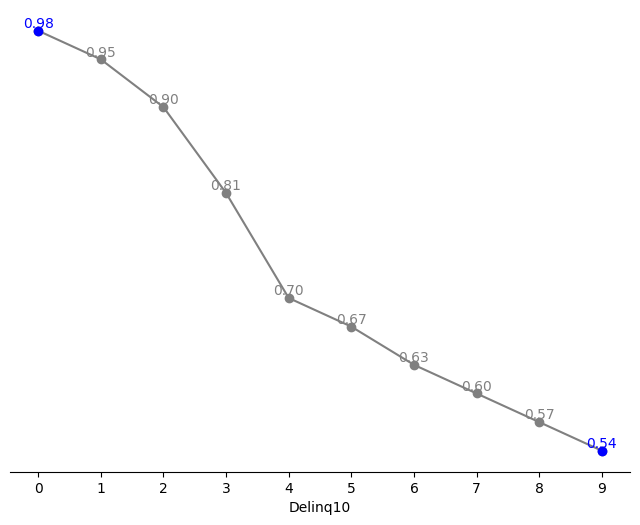

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0.98, 0.95, 0.90, 0.81, 0.70, 0.67, 0.63, 0.60, 0.57, 0.54])

# Define colors for the points and line
grey_color = 'grey'
blue_color = 'blue'

# Define a mask for the first and last points to be in blue
mask = np.ones(len(x), dtype=bool)
mask[1:-1] = False

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the line in light grey
plt.plot(x, y, '-o', color=grey_color, markerfacecolor=grey_color, label='_nolegend_')

# Overplot the first and last points in blue
plt.plot(x[mask], y[mask], 'o', color=blue_color, markerfacecolor=blue_color)

# Annotate the first and last points with their values in blue
for i in range(len(x)):
    color = blue_color if i == 0 or i == len(x) - 1 else grey_color
    plt.text(x[i], y[i], f'{y[i]:.2f}', color=color, ha='center', va='bottom')

# Set the x axis labels and ticks as per the original plot
plt.xlabel('Delinq10')
plt.xticks(x)

# Get the current axes instance
ax = plt.gca()

# Hide the left spine (y-axis line)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove the y-axis values
ax.yaxis.set_ticks([])

# Show the plot
plt.show()

In [ ]:
data_points = [
    {"PmtDate": "2021-11-30", "DueDate": "2021-11-07", "PmtAmt": 153.76, "PrinAmt": 5.78, "IntrAmt": 147.98, "Delinq10": 1, "DelinqTot": 1, "PmtAmt_per": 4.08, "PrinAmt_per": 0.15, "IntrAmt_per": 3.92},
    {"PmtDate": "2021-11-30", "DueDate": "2021-12-07", "PmtAmt": 461.28, "PrinAmt": 185.81, "IntrAmt": 275.47, "Delinq10": 1, "DelinqTot": 2, "PmtAmt_per": 12.23, "PrinAmt_per": 4.92, "IntrAmt_per": 7.30},
    {"PmtDate": "2022-05-30", "DueDate": "2022-05-07", "PmtAmt": 1537.6, "PrinAmt": 788.02, "IntrAmt": 749.58, "Delinq10": 2, "DelinqTot": 3, "PmtAmt_per": 40.75, "PrinAmt_per": 20.89, "IntrAmt_per": 19.87},
    {"PmtDate": "2022-08-01", "DueDate": "2022-06-07", "PmtAmt": 1691.31, "PrinAmt": 831.12, "IntrAmt": 879.69, "Delinq10": 3, "DelinqTot": 4, "PmtAmt_per": 44.83, "PrinAmt_per": 22.03, "IntrAmt_per": 23.31},
    {"PmtDate": "2022-08-30", "DueDate": "2022-07-07", "PmtAmt": 1845.07, "PrinAmt": 874.24, "IntrAmt": 990.33, "Delinq10": 4, "DelinqTot": 5, "PmtAmt_per": 48.90, "PrinAmt_per": 23.17, "IntrAmt_per": 26.25},
    {"PmtDate": "2022-10-03", "DueDate": "2022-08-07", "PmtAmt": 1998.83, "PrinAmt": 967.95, "IntrAmt": 1050.38, "Delinq10": 5, "DelinqTot": 6, "PmtAmt_per": 52.98, "PrinAmt_per": 25.65, "IntrAmt_per": 27.84},
    {"PmtDate": "2022-10-31", "DueDate": "2022-09-07", "PmtAmt": 2152.59, "PrinAmt": 1051.62, "IntrAmt": 1120.47, "Delinq10": 6, "DelinqTot": 7, "PmtAmt_per": 57.05, "PrinAmt_per": 27.87, "IntrAmt_per": 29.70},
    {"PmtDate": "2022-11-30", "DueDate": "2022-10-07", "PmtAmt": 2306.35, "PrinAmt": 1147.15, "IntrAmt": 1175.5, "Delinq10": 7, "DelinqTot": 8, "PmtAmt_per": 61.13, "PrinAmt_per": 30.40, "IntrAmt_per": 31.16},
    {"PmtDate": "2022-12-30", "DueDate": "2022-11-07", "PmtAmt": 2460.11, "PrinAmt": 1242.68, "IntrAmt": 1233.73, "Delinq10": 8, "DelinqTot": 9, "PmtAmt_per": 65.20, "PrinAmt_per": 32.94, "IntrAmt_per": 32.70},
    {"PmtDate": "2023-01-30", "DueDate": "2022-12-07", "PmtAmt": 2613.87, "PrinAmt": 131.09, "IntrAmt": 1288.52, "Delinq10": 9, "DelinqTot": 10, "PmtAmt_per": 69.27, "PrinAmt_per": 3.47, "IntrAmt_per": 34.15}
]


Convert the Dictionary to a DataFrame

In [ ]:
input_data = pd.DataFrame([row_as_dict])

The Prediction

In [ ]:
probability = model_1.predict(input_data)

print(f"The predicted probability is: {probability[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The predicted probability is: [0.9786262]


0: 9786262
1:
2:
3:


In [ ]:
account[(account['RiskScore'] == 7445) & (account['Delinq10'] == 9)]

,Acct,FinProd,Brand,BrandGroup,Promo,LoanAmt,Industry,RiskScore,Upgrade,Income,...,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus
30613,48132454,IBFR,RAINBOW,R,3D3S,3773.07,HOME CLEAN,7445,N,12000.0,...,0,0,0,0,10,N,N,A,ACTIVE,


In [1]:
account[account['CHARGEBACK']]

NameError: name 'account' is not defined

In [ ]:
pd.set_option('display.max_columns', None)

account[account['Acct'] == 48132454]

,Acct,FinProd,Brand,BrandGroup,Promo,LoanAmt,Industry,RiskScore,Upgrade,Income,IncType1,IncType2,JobYears1,JobYears2,Age1,Age2,HomeType,DownPmt,COamt,Payments,Delinq10,Delinq30,Delinq60,Delinq90,Delinq120,DelinqTot,FPDever,FPD,PmtType,Status,ClosedStatus
30613,48132454,IBFR,RAINBOW,R,3D3S,3773.07,HOME CLEAN,7445,N,12000.0,WAGES,WAGES,4.0,2.0,21,52,HOUSE,0.0,NaN,16,9,0,0,0,0,10,N,N,A,ACTIVE,


In [ ]:
call[call['Acct'] == 48132454	]

,CallID,Acct,Line,InterCode,InterType,PurpCode,PurpType,DispCode,DispType,Direction,CallDate,Workgroup,Campaign,CampType,WrapCat,WrapCode
506828,42541846,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,0,NaN,0,NaN,Outbound,2022-07-13 07:47:26.897,Customer Service,NaN,NaN,NaN,NaN
739736,41000172,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,2,NaN,0,NaN,Outbound,2021-10-19 11:39:34.353,Dialer Recovery,Recovery,SCRIPTER,Failure,aa294ba0-ed5a-41c3-82c5-70fa603f9c6b
741663,41002505,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,0,NaN,0,NaN,Outbound,2021-10-19 16:05:53.527,Recovery,NaN,NaN,NaN,NaN
812235,41163184,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,2,NaN,0,NaN,Outbound,2021-11-17 16:44:16.897,Dialer Recovery,Recovery,SCRIPTER,Success,985e3516-4062-4781-bf56-04eda5ffbe7f
1332124,42240576,48132454,PSTCN-M800B01_CTL,Call Object,0,0,NaN,0,NaN,Outbound,2022-05-20 19:49:08.047,Customer Service,NaN,NaN,NaN,NaN
1422781,42409738,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,0,NaN,0,NaN,Outbound,2022-06-20 11:17:07.063,Customer Service,NaN,NaN,NaN,NaN
1422918,42410105,48132454,PSTCN-M800B01_CTL,Call Object,0,0,NaN,0,NaN,Outbound,2022-06-20 12:01:15.907,Customer Service,NaN,NaN,NaN,NaN
1944954,40234154,48132454,PSTCN-M800B01_CTL,Call Object,0,0,NaN,0,NaN,Inbound,2021-06-07 21:10:02.003,Canada Zip,NaN,NaN,NaN,NaN
2127683,40585122,48132454,PSTCN-M800B01_CTL,Call Object,0,2,NaN,0,NaN,Outbound,2021-08-04 10:05:08.713,Dialer Courtesy Calls,Courtesy,SCRIPTER,Success,0ac600cd-a84c-42a8-8866-e7f660064db9
2133211,40594853,48132454,PSTCN-M800B01_CTL,Call Object,0,0,NaN,0,NaN,Outbound,2021-08-05 13:04:37.757,Customer Service,NaN,NaN,NaN,NaN


In [ ]:
call['CallDate'] = pd.to_datetime(call['CallDate'])
sorted_data = call.sort_values('CallDate')

sorted_data = call[(call['WrapCat'] == 'Success') | (call['WrapCat'] == 'Failure')]

sorted_data[sorted_data['Acct'] == 48132454	]

,CallID,Acct,Line,InterCode,InterType,PurpCode,PurpType,DispCode,DispType,Direction,CallDate,Workgroup,Campaign,CampType,WrapCat,WrapCode
739736,41000172,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,2,NaN,0,NaN,Outbound,2021-10-19 11:39:34.353,Dialer Recovery,Recovery,SCRIPTER,Failure,aa294ba0-ed5a-41c3-82c5-70fa603f9c6b
812235,41163184,48132454,PSTCN-M800B01_NobelBiz,Call Object,0,2,NaN,0,NaN,Outbound,2021-11-17 16:44:16.897,Dialer Recovery,Recovery,SCRIPTER,Success,985e3516-4062-4781-bf56-04eda5ffbe7f
2127683,40585122,48132454,PSTCN-M800B01_CTL,Call Object,0,2,NaN,0,NaN,Outbound,2021-08-04 10:05:08.713,Dialer Courtesy Calls,Courtesy,SCRIPTER,Success,0ac600cd-a84c-42a8-8866-e7f660064db9


In [ ]:
payment[payment['Acct'] == 48132454]

,PmtID,Acct,PmtType,PmtDate,PostDate,PmtAmt,PrinAmt,IntrAmt,Reversal,Overpayment,DueDate,PmtNbr
3030048,1238384044,48132454,PHONEPAY,2021-10-07,2021-10-07,153.76,5.78,147.98,0,0,2021-10-07,2
3030049,1238384047,48132454,PHONEPAY,2021-11-30,2021-11-30,307.52,180.03,127.49,0,0,2021-11-07,3
3030050,1238384047,48132454,PHONEPAY,2021-11-30,2021-11-30,307.52,180.03,127.49,0,0,2021-12-07,4
3030051,1238384048,48132454,PHONEPAY,2021-12-30,2021-12-30,153.76,83.70,70.06,0,0,2022-01-07,5
3030052,1238384049,48132454,PHONEPAY,2022-01-31,2022-01-31,153.76,81.34,72.42,0,0,2022-02-07,6
3030053,1238384050,48132454,PHONEPAY,2022-02-28,2022-02-28,153.76,86.88,66.88,0,0,2022-03-07,7
3030054,1238384051,48132454,PHONEPAY,2022-03-30,2022-03-30,153.76,87.50,66.26,0,0,2022-04-07,8
3030055,1238384052,48132454,PHONEPAY,2022-05-02,2022-05-02,153.76,82.76,71.00,0,0,2022-05-07,9
3030056,1238384054,48132454,PHONEPAY,2022-05-30,2022-05-30,153.76,23.65,130.11,0,0,2022-05-07,9
3030057,1238384057,48132454,PHONEPAY,2022-08-01,2022-08-01,153.76,43.12,110.64,0,0,2022-06-07,10


1- PmtDate: 2021-11-30. DueDate: 2021-11-07. PmtAmt: 153.76. PrinAmt. 5.78. IntrAmt: 147.98. Delinq10: 1. DelinqTot: 1
2- PmtDate: 2021-11-30. DueDate: 2021-12-07. PmtAmt: 461.28. PrinAmt. 185.81. IntrAmt: 275.47.Delinq10: 1. DelinqTot: 2
3- PmtDate: 2022-05-30. DueDate: 2022-05-07. PmtAmt:  1537.6 . PrinAmt: 788.02. IntrAmt: 749.58 . Delinq10: 2. DelinqTot: 3
4- PmtDate: 2022-08-01 . DueDate: 2022-06-07. PmtAmt: 1691.31  . PrinAmt:831.12 . IntrAmt:879.69  . Delinq10: 3. DelinqTot: 4
5- PmtDate: 2022-08-30 . DueDate:2022-07-07	 . PmtAmt: 1845.07  . PrinAmt:874.24 . IntrAmt:990.33  . Delinq10: 4. DelinqTot: 5
6- PmtDate:2022-10-03  . DueDate: 2022-08-07. PmtAmt:1998.83  . PrinAmt:967.95 . IntrAmt: 1050.38 . Delinq10: 5. DelinqTot: 6
7- PmtDate: 2022-10-31 . DueDate:2022-09-07	 . PmtAmt: 2152.59  . PrinAmt:1051.62 . IntrAmt:1120.47  . Delinq10: 6. DelinqTot: 7
8- PmtDate: 2022-11-30	. DueDate:	2022-10-07. PmtAmt: 2306.35  . PrinAmt:1147.15 . IntrAmt: 1175.5. Delinq10: 7. DelinqTot: 8
9- PmtDate: 2022-12-30	. DueDate:2022-11-07. PmtAmt: 2460.11  . PrinAmt:1242.68  . IntrAmt: 1233.73 . Delinq10: 8. DelinqTot: 9
10- PmtDate: 2023-01-30	. DueDate:2022-12-07. PmtAmt:2613.87   . PrinAmt: 131.09 . IntrAmt: 1288.52 . Delinq10: 9. DelinqTot: 10

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_1")


In [ ]:
model_1.fit(X_train, y_train, epochs=5, callbacks=[tensorboard_callback])


Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2238e-08
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5121e-09
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6426e-09
Epoch 4/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5603e-09
Epoch 5/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8751e-09


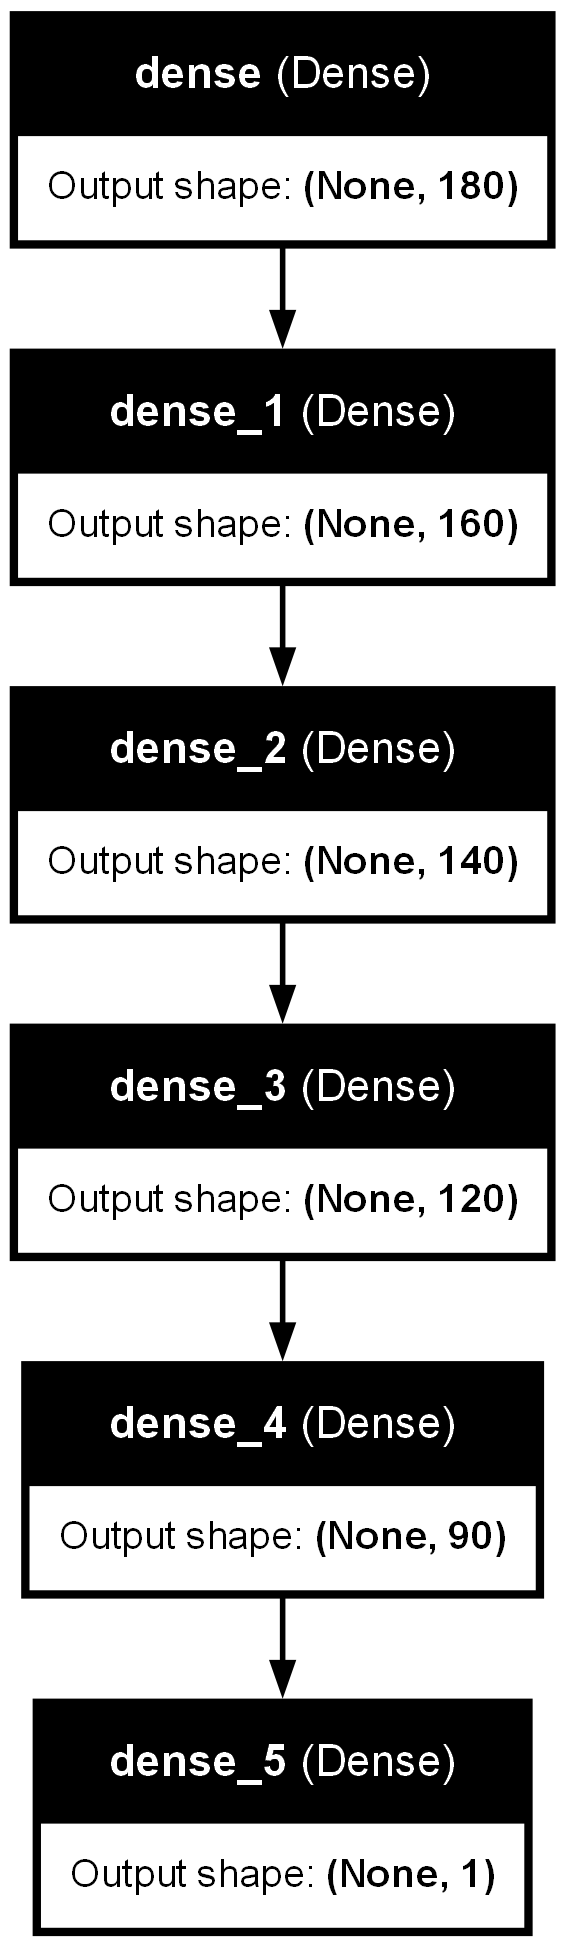

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='model1_architecture.png', show_shapes=True, show_layer_names=True)
